

---

# DATASET DOWNLOAD

In [8]:
import kagglehub

path = kagglehub.dataset_download("andrewmvd/ocular-disease-recognition-odir5k")

print("Path to dataset files:", path)

'''
possiamo decidere il numero di classi, sviluppare almeno 2 algoritmi di classificazione
per esempio algoritmo CNN e algoritmo estrazione delle features.
layer da aggiungere nelle reti neurali vantaggio e svantaggio nell'aggiungerlo, le sue caratteristiche
Keras libreria per deep learning per python, sviluppato da Google, più utilizzata per le immagini
PyTorch sviluppata da Facebook
si possono utilizzare insieme
'''



Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/ocular-disease-recognition-odir5k/versions/2


"\npossiamo decidere il numero di classi, sviluppare almeno 2 algoritmi di classificazione\nper esempio algoritmo CNN e algoritmo estrazione delle features.\nlayer da aggiungere nelle reti neurali vantaggio e svantaggio nell'aggiungerlo, le sue caratteristiche\nKeras libreria per deep learning per python, sviluppato da Google, più utilizzata per le immagini\nPyTorch sviluppata da Facebook\nsi possono utilizzare insieme\n"



---

# ORGANIZZAZIONE DATI E ANALISI HSV

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from scipy.stats import skew, kurtosis


immaginipath=path+"/preprocessed_images"
data=pd.read_csv(path+'/full_df.csv')
#print(np.shape(data))
#righe=print(len(data['N']))
#print(data['N'][1])

N, D, G, C, A, H, M, O = [], [], [], [], [], [], [], []

TOT = [N,D,G,C,A,H,M,O]
TOT_ = ['N','D','G','C','A','H','M','O']
#divisione delle immagini
for i in range(np.shape(data)[0]):
  if data['labels'][i]=="['N']":
    N.append(data['filename'][i])
  elif data['labels'][i]=="['D']":
    D.append(data['filename'][i])
  elif data['labels'][i]=="['G']":
    G.append(data['filename'][i])
  elif data['labels'][i]=="['C']":
    C.append(data['filename'][i])
  elif data['labels'][i]=="['A']":
    A.append(data['filename'][i])
  elif data['labels'][i]=="['H']":
    H.append(data['filename'][i])
  elif data['labels'][i]=="['M']":
    M.append(data['filename'][i])
  elif data['labels'][i]=="['O']":
    O.append(data['filename'][i])


def create_circular_mask(h, w, center=None, radius=None):
    """
    Crea una maschera circolare di dimensioni h x w.
    - center: (x, y) centro del cerchio. Se None, è il centro dell'immagine.
    - radius: raggio del cerchio. Se None, usa il più piccolo tra altezza/larghezza.
    """
    if center is None:
        center = (int(w/2), int(h/2))  # Centro dell'immagine
    if radius is None:
        radius = min(h, w) // 4  # Raggio di default

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    mask = dist_from_center <= radius
    return mask

results =[]
categories = {
    "N": N, "D": D, "G": G, "C": C,
    "A": A, "H": H, "M": M, "O": O
}

for category, images in categories.items():
  for file in images: #gira sulle immagini della malattia
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
    # Dimensioni dell'immagine
    h, w, _ = img.shape

    # Crea la maschera circolare
    center = (w // 2, h // 2)  # Centro dell'immagine
    radius = 256  # Raggio del cerchio
    circular_mask = create_circular_mask(h, w, center=center, radius=radius)

    # Applica la maschera al canale H
    img_circular = img[circular_mask]

    # Calcola le statistiche sui pixel della patch circolare
    mean_h_circular = np.mean(img_circular)
    median_h_circular = np.median(img_circular)
    std_h_circular = np.std(img_circular)

    # Crea una versione dell'immagine con la maschera applicata
    masked_image = np.copy(img)
    masked_image[~circular_mask] = 0  # Imposta i pixel esterni al cerchio a 0
   # Applica la maschera ai canali HSV
    H, S, V = cv2.split(img)
    H_circular = H[circular_mask]
    S_circular = S[circular_mask]
    V_circular = V[circular_mask]

  # Calcola le statistiche per la patch
    stats = {
        'Category': category,
        'Image': file,
        'Mean_H': np.mean(H_circular),
        'Median_H': np.median(H_circular),
        'Std_H': np.std(H_circular),
        'Skewness_H': skew(H_circular),
        'Kurtosis_H': kurtosis(H_circular),
        'Mean_S': np.mean(S_circular),
        'Median_S': np.median(S_circular),
        'Std_S': np.std(S_circular),
        'Skewness_S': skew(S_circular),
        'Kurtosis_S': kurtosis(S_circular),
        'Mean_V': np.mean(V_circular),
        'Median_V': np.median(V_circular),
        'Std_V': np.std(V_circular),
        'Skewness_V': skew(V_circular),
        'Kurtosis_V': kurtosis(V_circular)
    }
    results.append(stats)

# Crea un DataFrame dai risultati
df_stats = pd.DataFrame(results)

# Salva i risultati su un file CSV
df_stats.to_csv("hsv_patch_stats.csv", index=False)

# Visualizza i primi risultati
print(df_stats.head())


  Category         Image     Mean_H  Median_H     Std_H  Skewness_H  \
0        N   0_right.jpg  16.913475      15.0  6.822023    1.726585   
1        N   1_right.jpg  13.811638      14.0  2.258315    2.749910   
2        N   8_right.jpg   7.395868       8.0  1.554694   31.917347   
3        N  10_right.jpg   9.870450       9.0  2.200385   13.161490   
4        N  29_right.jpg  15.313054      13.0  9.070848    7.928312   

    Kurtosis_H      Mean_S  Median_S      Std_S  Skewness_S  Kurtosis_S  \
0     3.905101  155.249933     164.0  31.676681   -0.921068    0.917135   
1   236.923448  143.812435     144.0  13.386761    2.563535   28.291449   
2  3591.182163  191.862197     194.0  17.080136   -0.574441    2.629672   
3   743.348668  154.426326     161.0  31.933013   -0.508318   -0.792365   
4   111.686707  126.893908     127.0  24.870426    1.400969    8.985383   

       Mean_V  Median_V      Std_V  Skewness_V  Kurtosis_V  
0   80.019406      78.0  25.682900    0.765088    0.930475  


In [ ]:
from google.colab import files
files.download('hsv_patch_stats.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-3-70771af3374f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Mean_H", palette="viridis")
<ipython-input-3-70771af3374f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Mean_S", palette="coolwarm")
<ipython-input-3-70771af3374f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Mean_V", palette="crest")


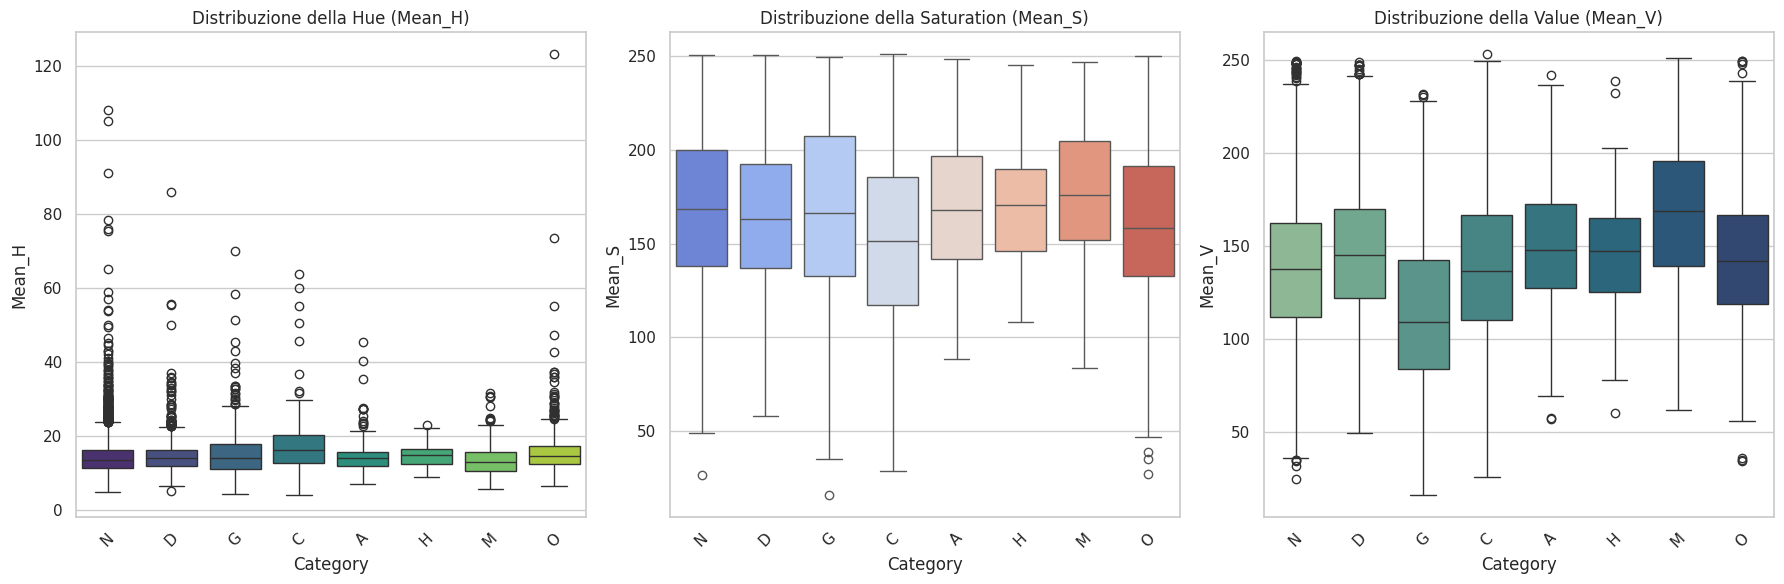

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Carica il file CSV con le statistiche HSV
file_path = "hsv_patch_stats.csv"
df = pd.read_csv(file_path)

# Configura lo stile di Seaborn
sns.set(style="whitegrid")

# Crea i boxplot per i canali H, S, V
plt.figure(figsize=(18, 6))

# Boxplot per Hue
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Category", y="Mean_H", palette="viridis")
plt.title("Distribuzione della Hue (Mean_H)")
plt.xticks(rotation=45)

# Boxplot per Saturation
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Category", y="Mean_S", palette="coolwarm")
plt.title("Distribuzione della Saturation (Mean_S)")
plt.xticks(rotation=45)

# Boxplot per Value
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Category", y="Mean_V", palette="crest")
plt.title("Distribuzione della Value (Mean_V)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import shapiro

channels = ['Mean_H', 'Mean_S', 'Mean_V',
            'Median_H','Median_S','Median_V',
            'Std_H','Std_S','Std_V',
            'Skewness_H', 'Skewness_S','Skewness_V',
            'Kurtosis_H','Kurtosis_S','Kurtosis_V']
categories = df['Category'].unique()

# Test di Shapiro-Wilk per normalità
for channel in channels:
    print(f"\nTest di normalità per {channel}:")
    for category in categories:
        data = df[df['Category'] == category][channel]
        stat, p_value = shapiro(data)
        print(f"Categoria {category}: stat={stat:.4f}, p-value={p_value:.4f}")
        if p_value > 0.05:
            print(f" -> La distribuzione per {category} è normale (p-value > 0.05).")

#p-value = 0 suggerisce che la discrepanza tra i dati e la distribuzione normale è così significativa che non può essere attribuita al caso.


Test di normalità per Mean_H:
Categoria N: stat=0.6677, p-value=0.0000
Categoria D: stat=0.7536, p-value=0.0000
Categoria G: stat=0.7684, p-value=0.0000
Categoria C: stat=0.8025, p-value=0.0000
Categoria A: stat=0.8128, p-value=0.0000
Categoria H: stat=0.9830, p-value=0.1099
 -> La distribuzione per H è normale (p-value > 0.05).
Categoria M: stat=0.9173, p-value=0.0000
Categoria O: stat=0.5957, p-value=0.0000

Test di normalità per Mean_S:
Categoria N: stat=0.9816, p-value=0.0000
Categoria D: stat=0.9822, p-value=0.0000
Categoria G: stat=0.9766, p-value=0.0001
Categoria C: stat=0.9870, p-value=0.0097
Categoria A: stat=0.9809, p-value=0.0012
Categoria H: stat=0.9811, p-value=0.0713
 -> La distribuzione per H è normale (p-value > 0.05).
Categoria M: stat=0.9853, p-value=0.0167
Categoria O: stat=0.9869, p-value=0.0000

Test di normalità per Mean_V:
Categoria N: stat=0.9976, p-value=0.0002
Categoria D: stat=0.9959, p-value=0.0002
Categoria G: stat=0.9842, p-value=0.0032
Categoria C: stat=

I risultati del test di normalità indicano che quasi tutte le categorie non seguono una distribuzione normale, a eccezione di alcune categorie per alcuni canali (ad esempio, "Mean_H" per la categoria H, "Mean_S" per la categoria H, e "Mean_V" per alcune categorie). Il p-value < 0.05 suggerisce che la distribuzione si discosta dalla normalità.

---



Nonostante alcune categorie abbiano un p-value > 0.05, data l'elevata prevalenza di p-value < 0.05, è più prudente usare test non parametrici.


---


*   Test per due categorie: Usa il Mann-Whitney U test.
*   Test per più categorie: Usa il Kruskal-Wallis test.





Analisi per il canale: Mean_H


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


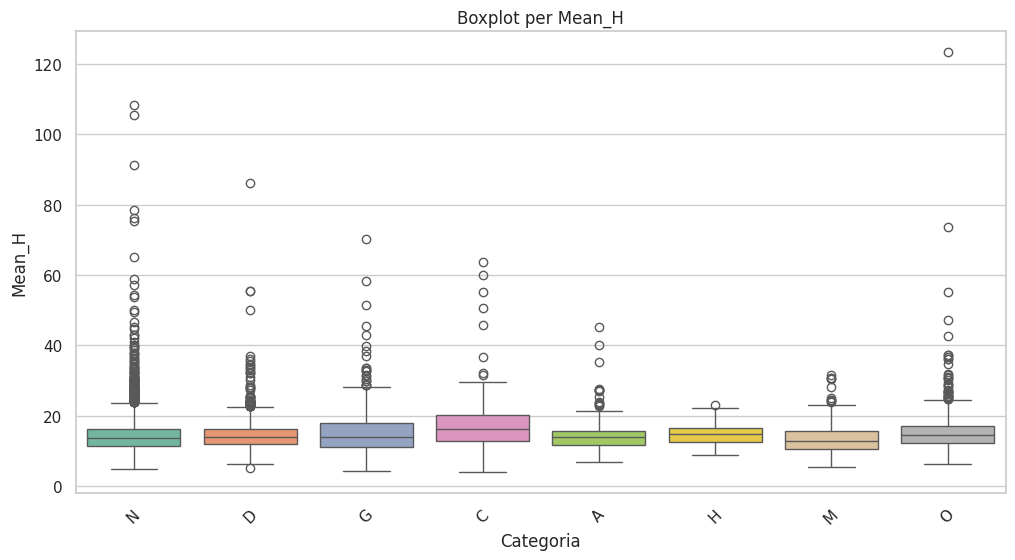

Confronto N vs D: stat=2217701.5000, p-value=2.6462e-02
 -> Differenza significativa tra N e D per Mean_H (p < 0.05)
Confronto N vs G: stat=386777.0000, p-value=1.4819e-01
 -> Nessuna differenza significativa tra N e G per Mean_H
Confronto N vs C: stat=299227.0000, p-value=3.2742e-16
 -> Differenza significativa tra N e C per Mean_H (p < 0.05)
Confronto N vs A: stat=374513.0000, p-value=5.9118e-01
 -> Nessuna differenza significativa tra N e A per Mean_H
Confronto N vs H: stat=160786.0000, p-value=1.6090e-02
 -> Differenza significativa tra N e H per Mean_H (p < 0.05)
Confronto N vs M: stat=372917.0000, p-value=2.5395e-03
 -> Differenza significativa tra N e M per Mean_H (p < 0.05)
Confronto N vs O: stat=892257.0000, p-value=4.1029e-07
 -> Differenza significativa tra N e O per Mean_H (p < 0.05)
Analisi per il canale: Mean_S


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


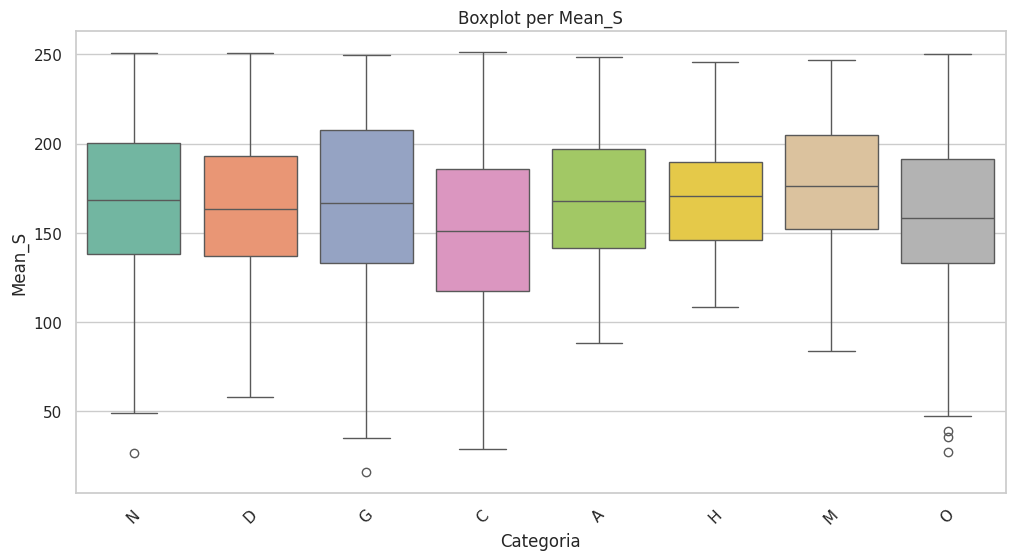

Confronto N vs D: stat=2419136.5000, p-value=8.5407e-03
 -> Differenza significativa tra N e D per Mean_S (p < 0.05)
Confronto N vs G: stat=412411.0000, p-value=7.6166e-01
 -> Nessuna differenza significativa tra N e G per Mean_S
Confronto N vs C: stat=506990.0000, p-value=7.6402e-09
 -> Differenza significativa tra N e C per Mean_S (p < 0.05)
Confronto N vs A: stat=384708.0000, p-value=8.5421e-01
 -> Nessuna differenza significativa tra N e A per Mean_S
Confronto N vs H: stat=183347.0000, p-value=9.5639e-01
 -> Nessuna differenza significativa tra N e H per Mean_S
Confronto N vs M: stat=292989.0000, p-value=2.1654e-03
 -> Differenza significativa tra N e M per Mean_S (p < 0.05)
Confronto N vs O: stat=1120934.0000, p-value=2.4843e-05
 -> Differenza significativa tra N e O per Mean_S (p < 0.05)
Analisi per il canale: Mean_V


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


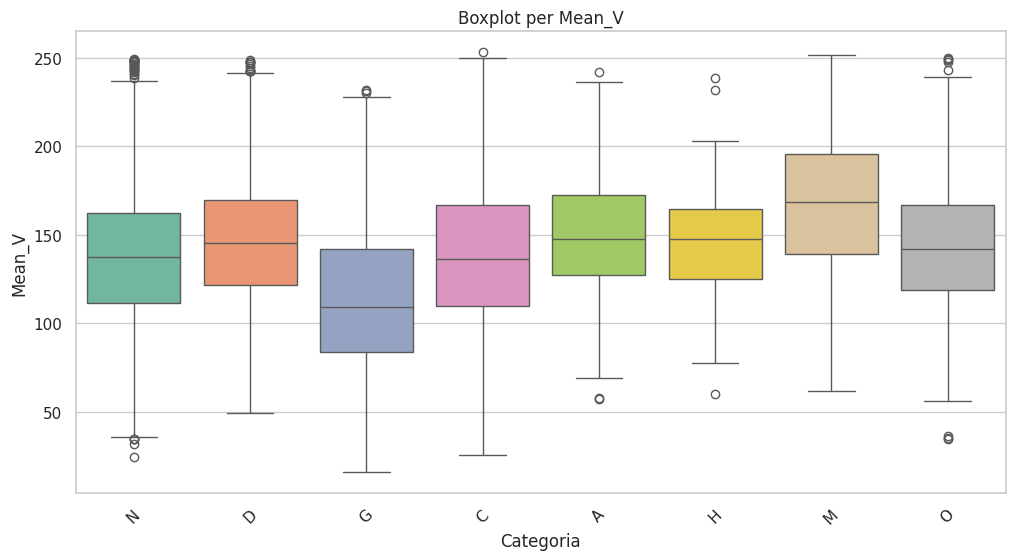

Confronto N vs D: stat=2002378.0000, p-value=1.3314e-13
 -> Differenza significativa tra N e D per Mean_V (p < 0.05)
Confronto N vs G: stat=548069.0000, p-value=1.1662e-21
 -> Differenza significativa tra N e G per Mean_V (p < 0.05)
Confronto N vs C: stat=417675.0000, p-value=8.2901e-01
 -> Nessuna differenza significativa tra N e C per Mean_V
Confronto N vs A: stat=310739.0000, p-value=4.4890e-07
 -> Differenza significativa tra N e A per Mean_V (p < 0.05)
Confronto N vs H: stat=156142.0000, p-value=3.8397e-03
 -> Differenza significativa tra N e H per Mean_V (p < 0.05)
Confronto N vs M: stat=187219.0000, p-value=1.0113e-28
 -> Differenza significativa tra N e M per Mean_V (p < 0.05)
Confronto N vs O: stat=920493.0000, p-value=8.9205e-05
 -> Differenza significativa tra N e O per Mean_V (p < 0.05)
Analisi per il canale: Median_H


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


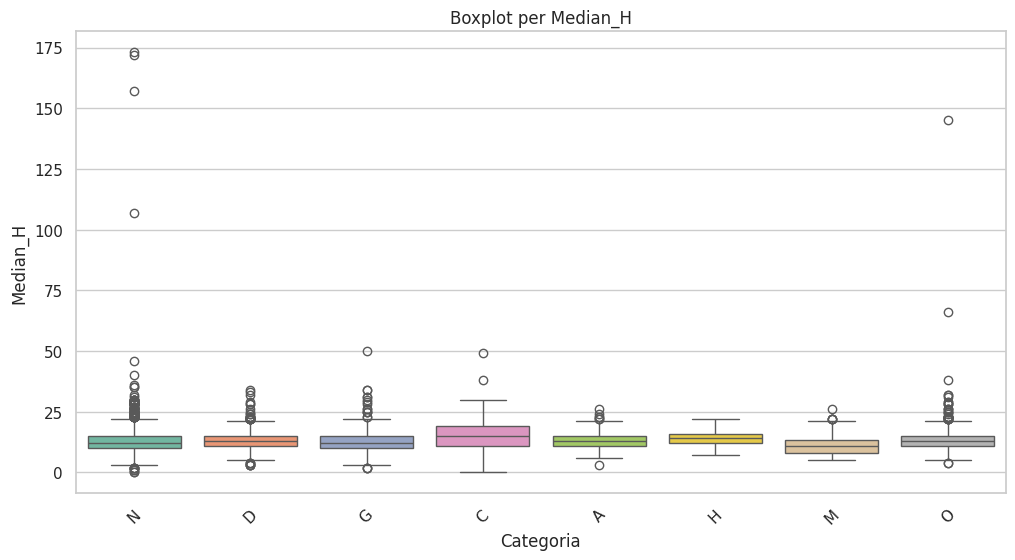

Confronto N vs D: stat=2095883.5000, p-value=2.2749e-07
 -> Differenza significativa tra N e D per Median_H (p < 0.05)
Confronto N vs G: stat=420703.0000, p-value=3.8278e-01
 -> Nessuna differenza significativa tra N e G per Median_H
Confronto N vs C: stat=290154.5000, p-value=1.3010e-18
 -> Differenza significativa tra N e C per Median_H (p < 0.05)
Confronto N vs A: stat=357305.0000, p-value=7.8130e-02
 -> Nessuna differenza significativa tra N e A per Median_H
Confronto N vs H: stat=141485.0000, p-value=9.0791e-06
 -> Differenza significativa tra N e H per Median_H (p < 0.05)
Confronto N vs M: stat=413135.5000, p-value=1.0215e-09
 -> Differenza significativa tra N e M per Median_H (p < 0.05)
Confronto N vs O: stat=891440.0000, p-value=3.0810e-07
 -> Differenza significativa tra N e O per Median_H (p < 0.05)
Analisi per il canale: Median_S


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


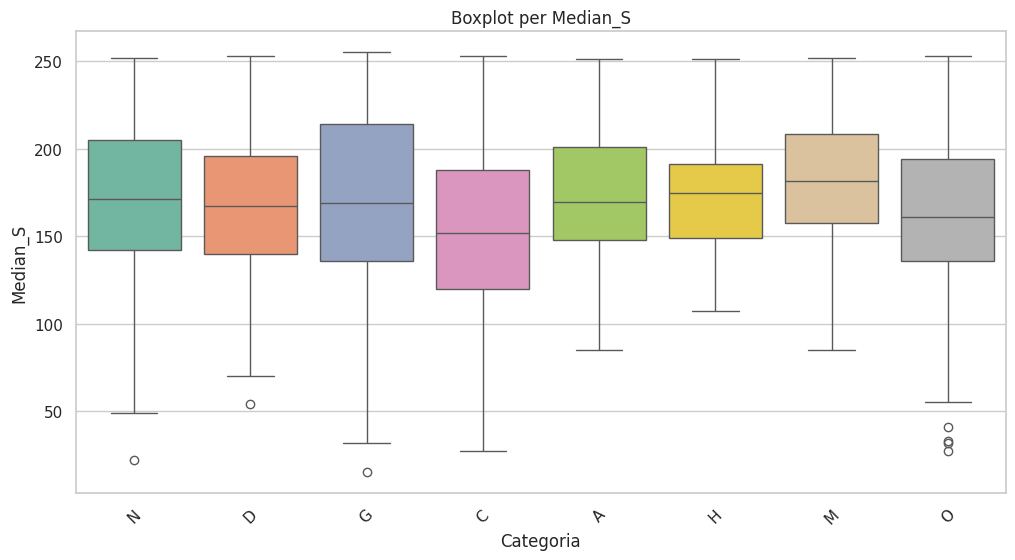

Confronto N vs D: stat=2438325.0000, p-value=1.9885e-03
 -> Differenza significativa tra N e D per Median_S (p < 0.05)
Confronto N vs G: stat=412961.5000, p-value=7.3319e-01
 -> Nessuna differenza significativa tra N e G per Median_S
Confronto N vs C: stat=512010.5000, p-value=9.7642e-10
 -> Differenza significativa tra N e C per Median_S (p < 0.05)
Confronto N vs A: stat=387298.5000, p-value=7.1365e-01
 -> Nessuna differenza significativa tra N e A per Median_S
Confronto N vs H: stat=185205.5000, p-value=8.8947e-01
 -> Nessuna differenza significativa tra N e H per Median_S
Confronto N vs M: stat=283548.0000, p-value=1.5343e-04
 -> Differenza significativa tra N e M per Median_S (p < 0.05)
Confronto N vs O: stat=1125990.5000, p-value=9.7991e-06
 -> Differenza significativa tra N e O per Median_S (p < 0.05)
Analisi per il canale: Median_V


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


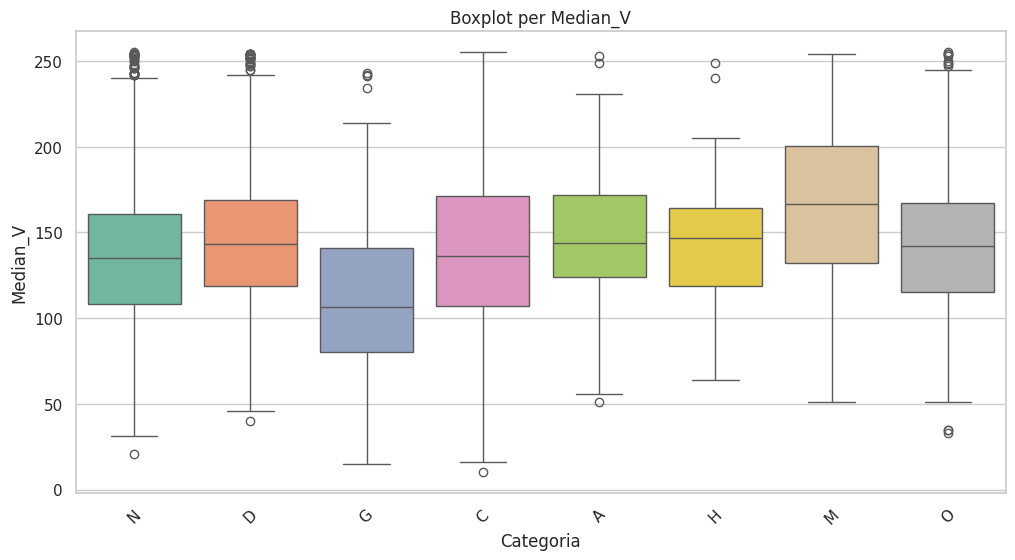

Confronto N vs D: stat=2001111.0000, p-value=1.0555e-13
 -> Differenza significativa tra N e D per Median_V (p < 0.05)
Confronto N vs G: stat=540596.5000, p-value=1.4122e-19
 -> Differenza significativa tra N e G per Median_V (p < 0.05)
Confronto N vs C: stat=401775.0000, p-value=1.9958e-01
 -> Nessuna differenza significativa tra N e C per Median_V
Confronto N vs A: stat=309765.0000, p-value=3.1206e-07
 -> Differenza significativa tra N e A per Median_V (p < 0.05)
Confronto N vs H: stat=158931.0000, p-value=9.3128e-03
 -> Differenza significativa tra N e H per Median_V (p < 0.05)
Confronto N vs M: stat=196259.5000, p-value=1.7845e-25
 -> Differenza significativa tra N e M per Median_V (p < 0.05)
Confronto N vs O: stat=918457.0000, p-value=6.3081e-05
 -> Differenza significativa tra N e O per Median_V (p < 0.05)
Analisi per il canale: Std_H


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


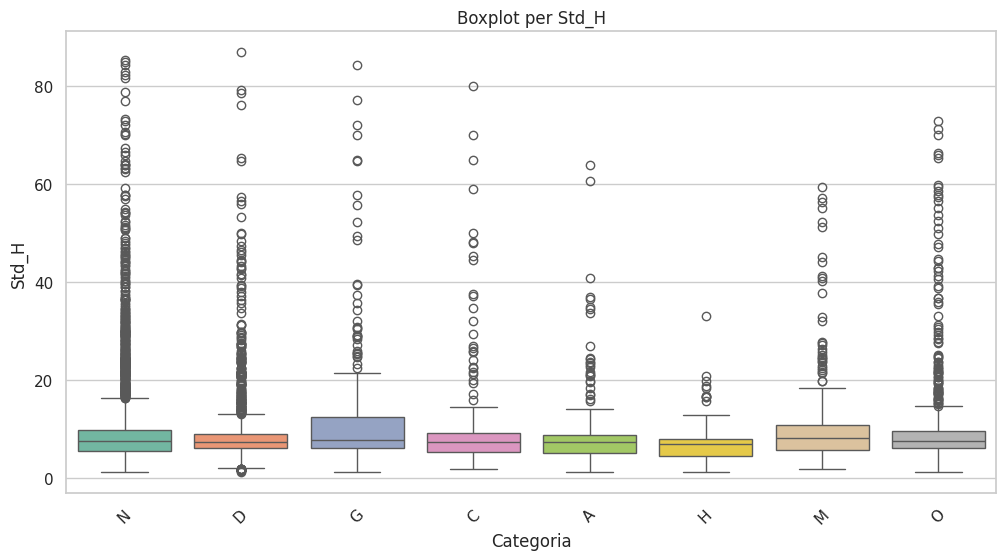

Confronto N vs D: stat=2351383.0000, p-value=3.1788e-01
 -> Nessuna differenza significativa tra N e D per Std_H
Confronto N vs G: stat=378150.0000, p-value=4.1881e-02
 -> Differenza significativa tra N e G per Std_H (p < 0.05)
Confronto N vs C: stat=439934.0000, p-value=2.0148e-01
 -> Nessuna differenza significativa tra N e C per Std_H
Confronto N vs A: stat=405819.0000, p-value=9.3613e-02
 -> Nessuna differenza significativa tra N e A per Std_H
Confronto N vs H: stat=211725.0000, p-value=3.6859e-03
 -> Differenza significativa tra N e H per Std_H (p < 0.05)
Confronto N vs M: stat=298768.0000, p-value=8.6247e-03
 -> Differenza significativa tra N e M per Std_H (p < 0.05)
Confronto N vs O: stat=997328.0000, p-value=4.2369e-01
 -> Nessuna differenza significativa tra N e O per Std_H
Analisi per il canale: Std_S


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


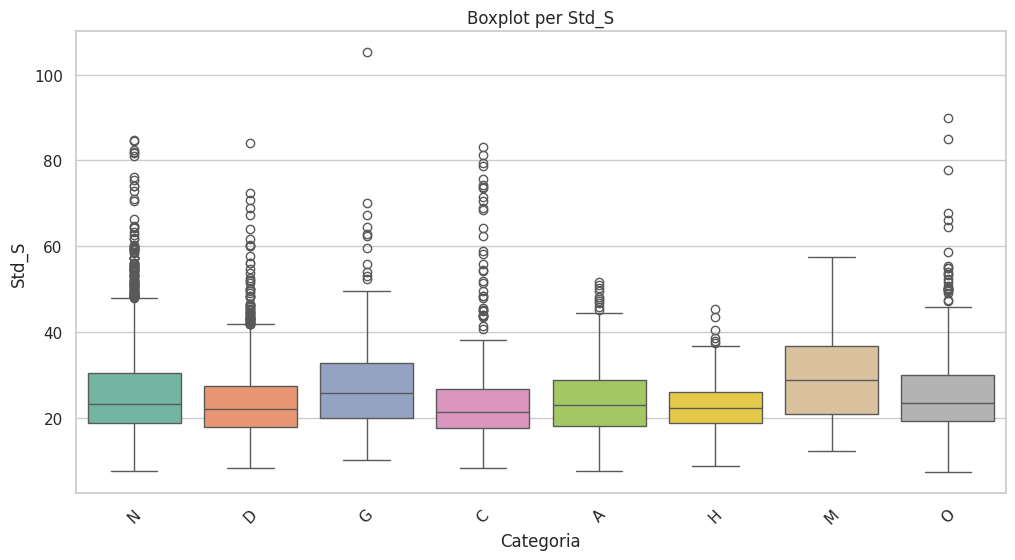

Confronto N vs D: stat=2552434.0000, p-value=5.2551e-09
 -> Differenza significativa tra N e D per Std_S (p < 0.05)
Confronto N vs G: stat=361497.0000, p-value=1.5184e-03
 -> Differenza significativa tra N e G per Std_S (p < 0.05)
Confronto N vs C: stat=467930.0000, p-value=1.6015e-03
 -> Differenza significativa tra N e C per Std_S (p < 0.05)
Confronto N vs A: stat=403372.0000, p-value=1.3269e-01
 -> Nessuna differenza significativa tra N e A per Std_S
Confronto N vs H: stat=204879.0000, p-value=2.8516e-02
 -> Differenza significativa tra N e H per Std_S (p < 0.05)
Confronto N vs M: stat=250580.0000, p-value=3.0676e-10
 -> Differenza significativa tra N e M per Std_S (p < 0.05)
Confronto N vs O: stat=1007057.0000, p-value=6.8533e-01
 -> Nessuna differenza significativa tra N e O per Std_S
Analisi per il canale: Std_V


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


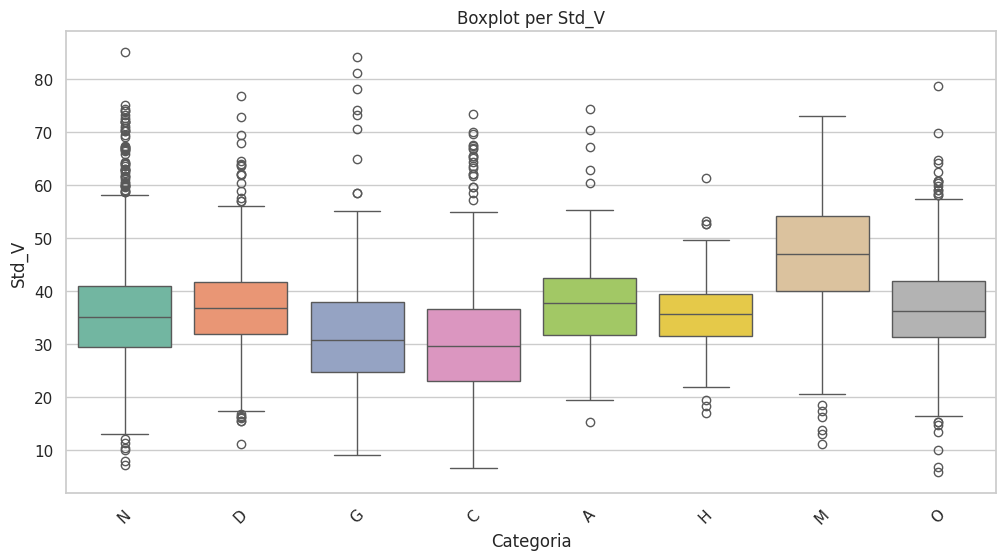

Confronto N vs D: stat=2078352.0000, p-value=2.4892e-08
 -> Differenza significativa tra N e D per Std_V (p < 0.05)
Confronto N vs G: stat=493089.0000, p-value=6.2844e-09
 -> Differenza significativa tra N e G per Std_V (p < 0.05)
Confronto N vs C: stat=538729.0000, p-value=2.6662e-15
 -> Differenza significativa tra N e C per Std_V (p < 0.05)
Confronto N vs A: stat=327556.0000, p-value=1.1444e-04
 -> Differenza significativa tra N e A per Std_V (p < 0.05)
Confronto N vs H: stat=178955.0000, p-value=6.0824e-01
 -> Nessuna differenza significativa tra N e H per Std_V
Confronto N vs M: stat=138699.0000, p-value=1.2026e-49
 -> Differenza significativa tra N e M per Std_V (p < 0.05)
Confronto N vs O: stat=931307.0000, p-value=5.0262e-04
 -> Differenza significativa tra N e O per Std_V (p < 0.05)
Analisi per il canale: Skewness_H


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


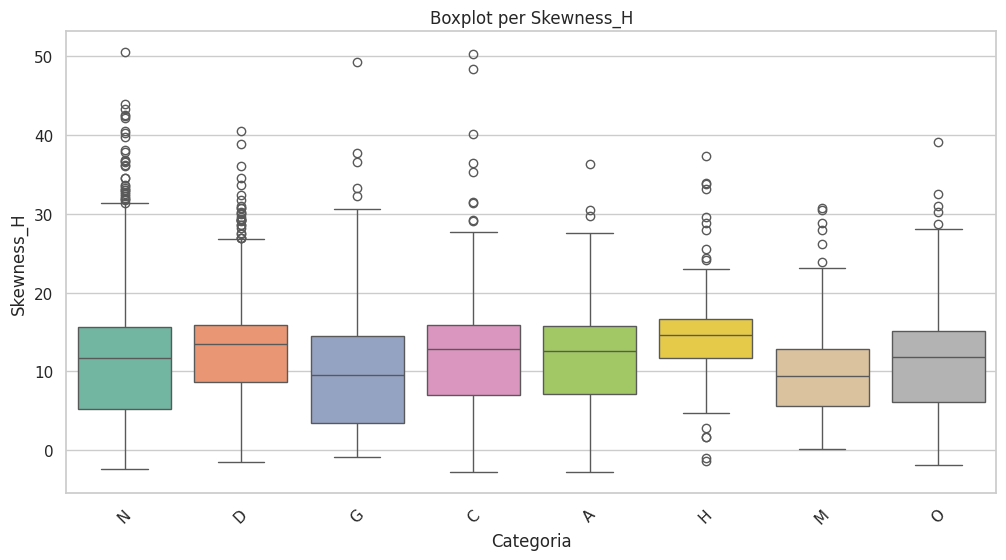

Confronto N vs D: stat=2010178.0000, p-value=5.3843e-13
 -> Differenza significativa tra N e D per Skewness_H (p < 0.05)
Confronto N vs G: stat=461884.0000, p-value=2.3370e-04
 -> Differenza significativa tra N e G per Skewness_H (p < 0.05)
Confronto N vs C: stat=390285.0000, p-value=4.0015e-02
 -> Differenza significativa tra N e C per Skewness_H (p < 0.05)
Confronto N vs A: stat=357054.0000, p-value=7.6436e-02
 -> Nessuna differenza significativa tra N e A per Skewness_H
Confronto N vs H: stat=134120.0000, p-value=2.1368e-07
 -> Differenza significativa tra N e H per Skewness_H (p < 0.05)
Confronto N vs M: stat=384249.0000, p-value=1.0388e-04
 -> Differenza significativa tra N e M per Skewness_H (p < 0.05)
Confronto N vs O: stat=1017657.0000, p-value=9.8010e-01
 -> Nessuna differenza significativa tra N e O per Skewness_H
Analisi per il canale: Skewness_S


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


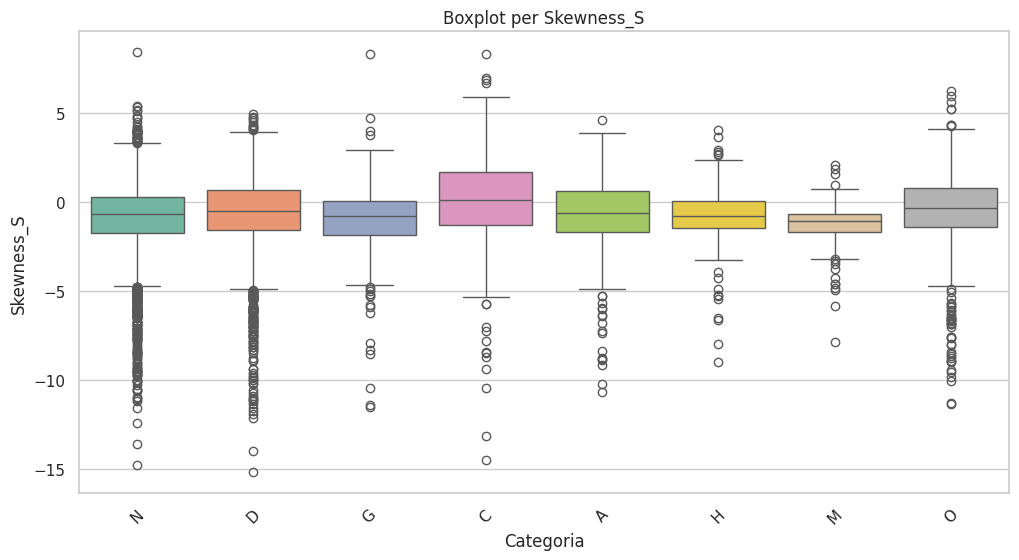

Confronto N vs D: stat=2140056.0000, p-value=4.3402e-05
 -> Differenza significativa tra N e D per Skewness_S (p < 0.05)
Confronto N vs G: stat=426521.0000, p-value=2.0544e-01
 -> Nessuna differenza significativa tra N e G per Skewness_S
Confronto N vs C: stat=319090.0000, p-value=8.4830e-12
 -> Differenza significativa tra N e C per Skewness_S (p < 0.05)
Confronto N vs A: stat=366245.0000, p-value=2.6195e-01
 -> Nessuna differenza significativa tra N e A per Skewness_S
Confronto N vs H: stat=183974.0000, p-value=9.9156e-01
 -> Nessuna differenza significativa tra N e H per Skewness_S
Confronto N vs M: stat=397434.0000, p-value=1.0334e-06
 -> Differenza significativa tra N e M per Skewness_S (p < 0.05)
Confronto N vs O: stat=897113.0000, p-value=1.1328e-06
 -> Differenza significativa tra N e O per Skewness_S (p < 0.05)
Analisi per il canale: Skewness_V


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


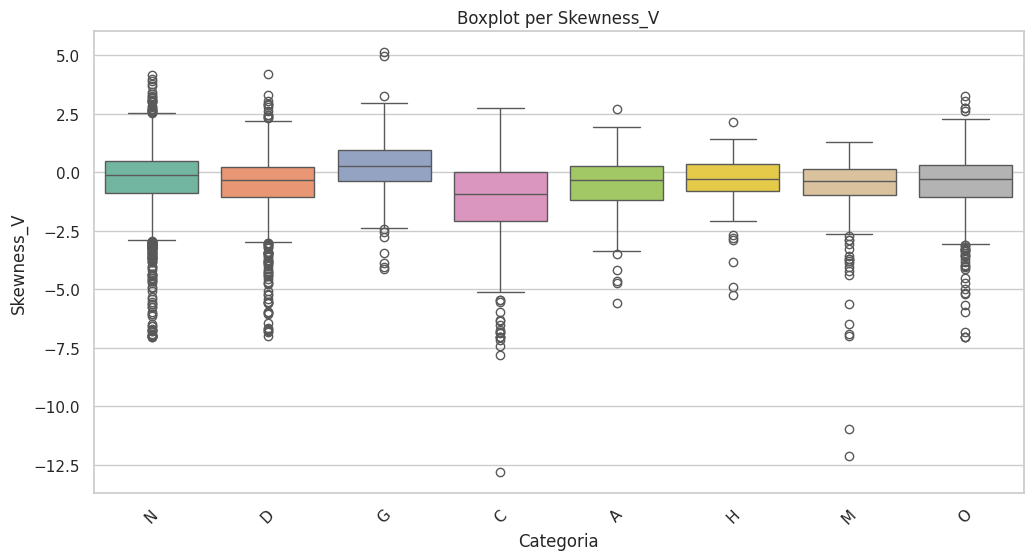

Confronto N vs D: stat=2585118.0000, p-value=3.4558e-11
 -> Differenza significativa tra N e D per Skewness_V (p < 0.05)
Confronto N vs G: stat=312775.0000, p-value=8.2441e-11
 -> Differenza significativa tra N e G per Skewness_V (p < 0.05)
Confronto N vs C: stat=570752.0000, p-value=8.8148e-24
 -> Differenza significativa tra N e C per Skewness_V (p < 0.05)
Confronto N vs A: stat=436340.0000, p-value=1.2559e-04
 -> Differenza significativa tra N e A per Skewness_V (p < 0.05)
Confronto N vs H: stat=194091.0000, p-value=2.8671e-01
 -> Nessuna differenza significativa tra N e H per Skewness_V
Confronto N vs M: stat=389183.0000, p-value=2.0720e-05
 -> Differenza significativa tra N e M per Skewness_V (p < 0.05)
Confronto N vs O: stat=1125636.0000, p-value=1.0479e-05
 -> Differenza significativa tra N e O per Skewness_V (p < 0.05)
Analisi per il canale: Kurtosis_H


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


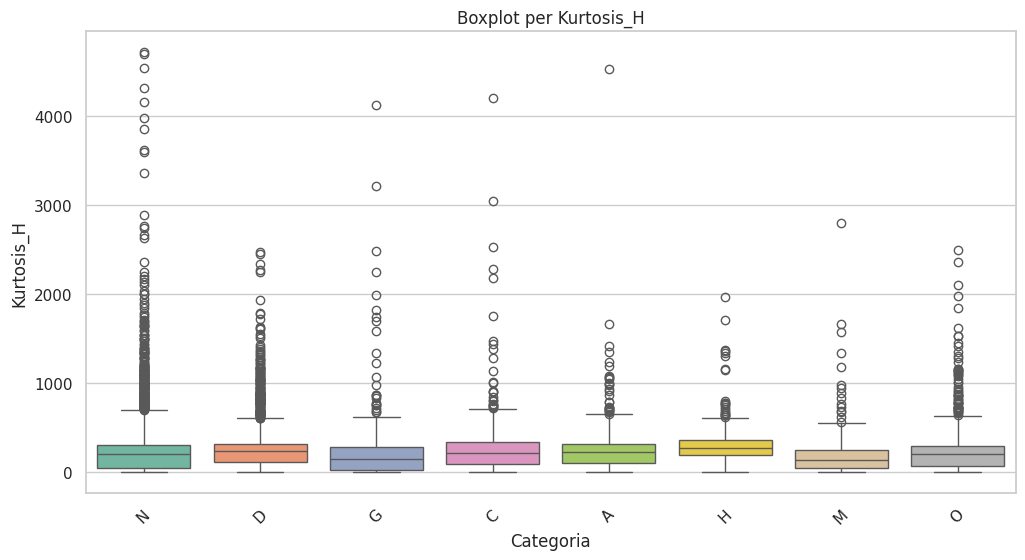

Confronto N vs D: stat=2044873.0000, p-value=1.7710e-10
 -> Differenza significativa tra N e D per Kurtosis_H (p < 0.05)
Confronto N vs G: stat=460709.0000, p-value=3.1907e-04
 -> Differenza significativa tra N e G per Kurtosis_H (p < 0.05)
Confronto N vs C: stat=386146.0000, p-value=1.9739e-02
 -> Differenza significativa tra N e C per Kurtosis_H (p < 0.05)
Confronto N vs A: stat=351163.0000, p-value=2.8645e-02
 -> Differenza significativa tra N e A per Kurtosis_H (p < 0.05)
Confronto N vs H: stat=135801.0000, p-value=5.3932e-07
 -> Differenza significativa tra N e H per Kurtosis_H (p < 0.05)
Confronto N vs M: stat=379364.0000, p-value=4.4907e-04
 -> Differenza significativa tra N e M per Kurtosis_H (p < 0.05)
Confronto N vs O: stat=1004420.0000, p-value=6.0850e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_H
Analisi per il canale: Kurtosis_S


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


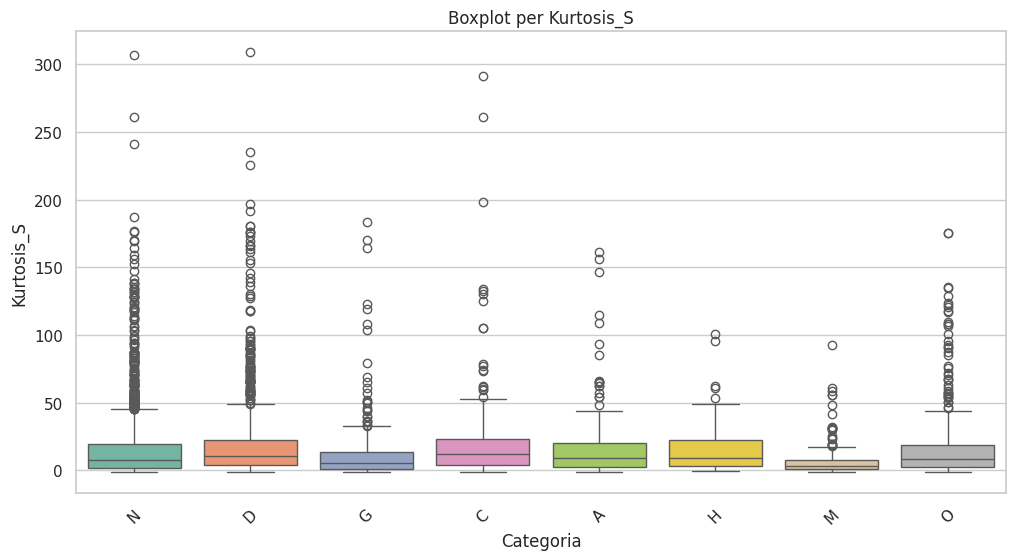

Confronto N vs D: stat=2003046.0000, p-value=1.5026e-13
 -> Differenza significativa tra N e D per Kurtosis_S (p < 0.05)
Confronto N vs G: stat=452683.0000, p-value=2.2764e-03
 -> Differenza significativa tra N e G per Kurtosis_S (p < 0.05)
Confronto N vs C: stat=353679.0000, p-value=6.4972e-06
 -> Differenza significativa tra N e C per Kurtosis_S (p < 0.05)
Confronto N vs A: stat=357469.0000, p-value=8.1438e-02
 -> Nessuna differenza significativa tra N e A per Kurtosis_S
Confronto N vs H: stat=168235.0000, p-value=1.0305e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_S
Confronto N vs M: stat=424640.0000, p-value=3.4891e-12
 -> Differenza significativa tra N e M per Kurtosis_S (p < 0.05)
Confronto N vs O: stat=1000762.0000, p-value=5.0882e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_S
Analisi per il canale: Kurtosis_V


<ipython-input-5-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


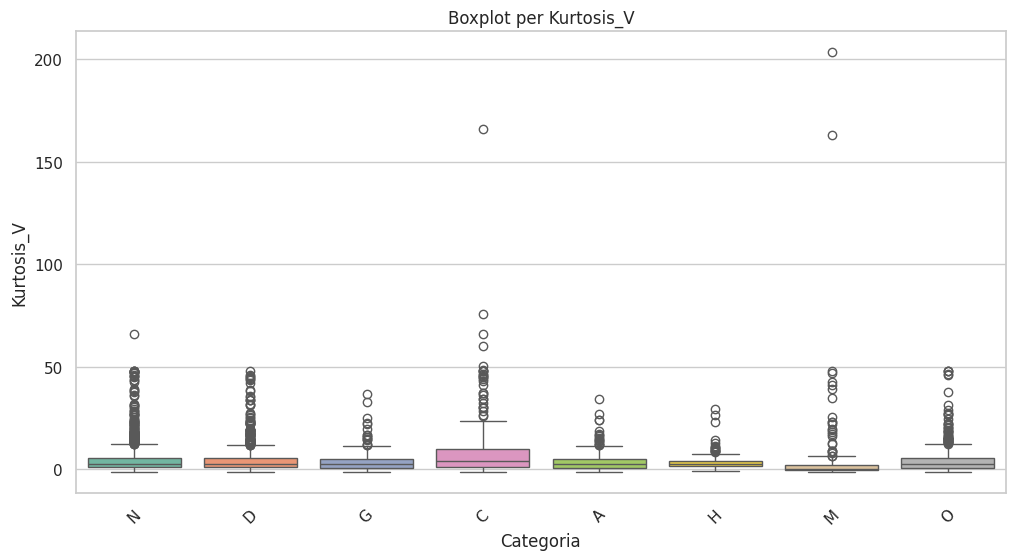

Confronto N vs D: stat=2266776.0000, p-value=2.9929e-01
 -> Nessuna differenza significativa tra N e D per Kurtosis_V
Confronto N vs G: stat=418952.0000, p-value=4.5345e-01
 -> Nessuna differenza significativa tra N e G per Kurtosis_V
Confronto N vs C: stat=342168.0000, p-value=1.2791e-07
 -> Differenza significativa tra N e C per Kurtosis_V (p < 0.05)
Confronto N vs A: stat=401138.0000, p-value=1.7843e-01
 -> Nessuna differenza significativa tra N e A per Kurtosis_V
Confronto N vs H: stat=175526.0000, p-value=3.8425e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_V
Confronto N vs M: stat=475369.0000, p-value=2.8084e-27
 -> Differenza significativa tra N e M per Kurtosis_V (p < 0.05)
Confronto N vs O: stat=1036275.0000, p-value=4.3509e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_V


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


# Funzione per creare boxplot e calcolare test statistici
def analyze_channel(df, channel, categories):
    print(f"Analisi per il canale: {channel}")

    # Creazione del boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')
    plt.title(f'Boxplot per {channel}')
    plt.xlabel('Categoria')
    plt.ylabel(channel)
    plt.xticks(rotation=45)
    plt.show()

    # Confronto tra Normale (N) e ciascuna patologia
    normal_values = df[df['Category'] == 'N'][channel].dropna()
    for category in categories:
        if category == 'N':
            continue
        category_values = df[df['Category'] == category][channel].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(normal_values, category_values, alternative='two-sided')
        print(f"Confronto N vs {category}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra N e {category} per {channel} (p < 0.05)")
        else:
            print(f" -> Nessuna differenza significativa tra N e {category} per {channel}")

# Analisi per ciascun canale HSV
for channel in channels:
    analyze_channel(df, channel, categories)


*  Hue (H): Differenze nei colori dominanti
Interpreta i valori di Hue:
Ad esempio, valori di Hue bassi indicano tonalità rosse, mentre valori alti indicano verde/blu.
*  Saturation (S): Differenze nell'intensità cromatica
  1.  Confronta le intensità di saturazione.
  2. Le immagini patologiche potrebbero avere una saturazione ridotta a causa di opacità o variazioni nei tessuti.
*  Value (V): Differenze nella luminosità
  1. Confronta la luminosità media.
  2. Le immagini con patologie potrebbero mostrare valori medi più bassi di luminosità (ad esempio, lesioni più scure).







---
# ANALISI RGB


In [21]:
immaginipath=path+"/preprocessed_images"
data=pd.read_csv(path+'/full_df.csv')
results =[]
categories = {
    "N": N, "D": D, "G": G, "C": C,
    "A": A, "H": H, "M": M, "O": O
}

for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
    # Dimensioni dell'immagine
    h, w, _ = img_rgb.shape

    # Crea la maschera circolare
    center = (w // 2, h // 2)  # Centro dell'immagine
    radius = 256  # Raggio del cerchio
    circular_mask = create_circular_mask(h, w, center=center, radius=radius)

    # Applica la maschera al canale H
    img_circular = img_rgb[circular_mask]

    # Calcola le statistiche sui pixel della patch circolare
    mean_h_circular = np.mean(img_circular)
    median_h_circular = np.median(img_circular)
    std_h_circular = np.std(img_circular)

    # Crea una versione dell'immagine con la maschera applicata
    masked_image = np.copy(img_rgb)
    masked_image[~circular_mask] = 0  # Imposta i pixel esterni al cerchio a 0
   # Applica la maschera ai canali HSV
    R, G, B = cv2.split(img_rgb)
    R_circular = R[circular_mask]
    G_circular = G[circular_mask]
    B_circular = B[circular_mask]

  # Calcola le statistiche per la patch
    stats = {
        'Category': category,
        'Image': file,
        'Mean_R': np.mean(R_circular),
        'Median_R': np.median(R_circular),
        'Std_R': np.std(R_circular),
        'Skewness_R': skew(R_circular),
        'Kurtosis_R': kurtosis(R_circular),
        'Mean_G': np.mean(G_circular),
        'Median_G': np.median(G_circular),
        'Std_G': np.std(G_circular),
        'Skewness_G': skew(G_circular),
        'Kurtosis_G': kurtosis(G_circular),
        'Mean_B': np.mean(B_circular),
        'Median_B': np.median(B_circular),
        'Std_B': np.std(B_circular),
        'Skewness_B': skew(B_circular),
        'Kurtosis_B': kurtosis(B_circular)
    }
    results.append(stats)

# Crea un DataFrame dai risultati
df_stats_RGB = pd.DataFrame(results)

# Salva i risultati su un file CSV
df_stats_RGB.to_csv("RGB_patch_stats.csv", index=False)

# Visualizza i primi risultati
print(df_stats_RGB.head())


  Category         Image      Mean_R  Median_R      Std_R  Skewness_R  \
0        N   0_right.jpg   79.862425      78.0  25.890529    0.732461   
1        N   1_right.jpg  165.723986     160.0  36.520842    0.047568   
2        N   8_right.jpg  163.066147     151.0  48.597259    0.430972   
3        N  10_right.jpg  179.221885     180.0  20.091592   -0.493307   
4        N  29_right.jpg   96.743072     101.0  28.628170   -0.583045   

   Kurtosis_R      Mean_G  Median_G      Std_G  Skewness_G  Kurtosis_G  \
0    0.885035   53.431164      51.0   9.092319    0.211648    6.020713   
1    0.925550  116.269267     109.0  29.636578    0.560028    1.792489   
2   -0.831371   71.393789      63.0  26.612990    0.966289    1.140276   
3    4.546928  104.488106     101.0  16.871050    0.676973    3.021195   
4    0.764294   73.332529      72.0  28.737508    0.681974    1.281046   

      Mean_B  Median_B      Std_B  Skewness_B  Kurtosis_B  
0  29.151191      28.0   5.719399    0.903760    7.32753

<ipython-input-22-0b662f63d35e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RGB_df, x="Category", y="Mean_R", palette="viridis")
<ipython-input-22-0b662f63d35e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RGB_df, x="Category", y="Mean_G", palette="coolwarm")
<ipython-input-22-0b662f63d35e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RGB_df, x="Category", y="Mean_B", palette="crest")


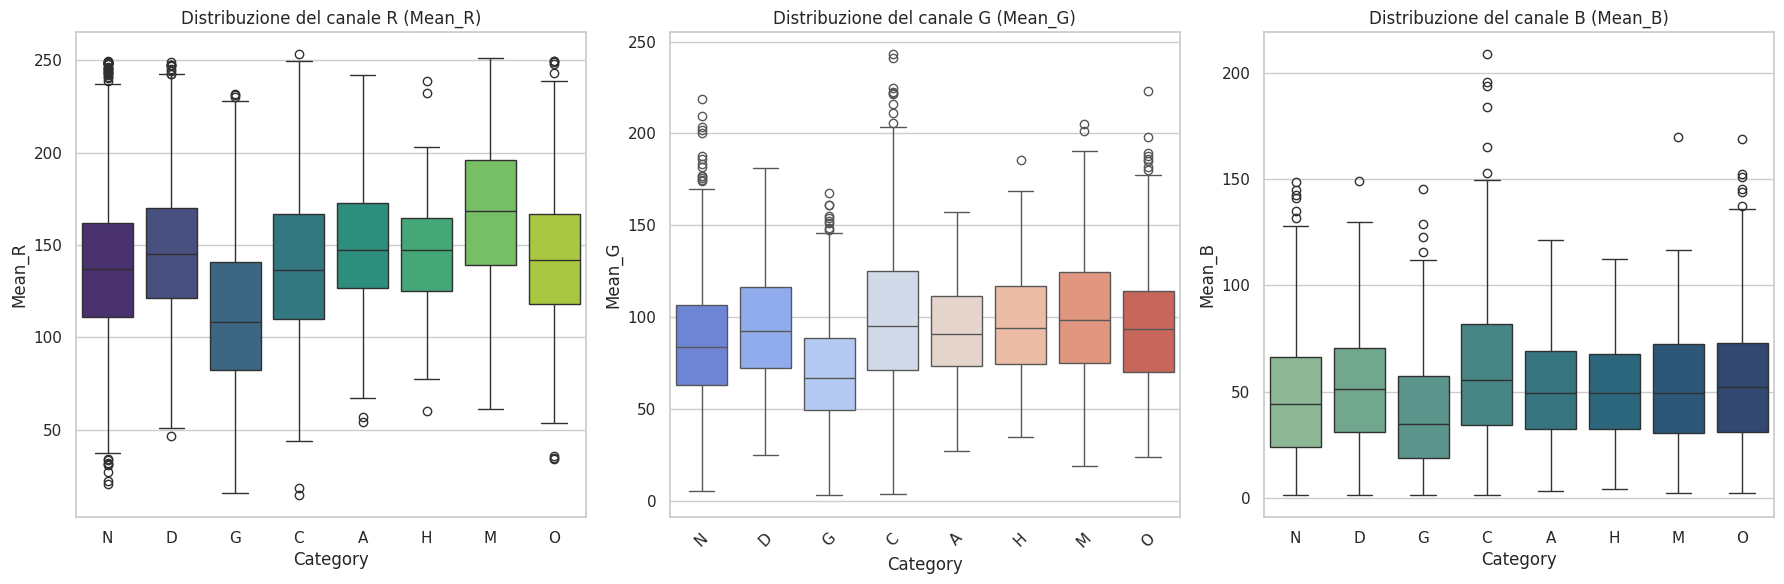

In [22]:
# Carica il file CSV con le statistiche HSV
file_path = "RGB_patch_stats.csv"
RGB_df = pd.read_csv(file_path)

# Configura lo stile di Seaborn
sns.set(style="whitegrid")

# Crea i boxplot per i canali H, S, V
plt.figure(figsize=(18, 6))

# Boxplot per canale R
plt.subplot(1, 3, 1)
sns.boxplot(data=RGB_df, x="Category", y="Mean_R", palette="viridis")
plt.title("Distribuzione del canale R (Mean_R)")

# Boxplot per G
plt.subplot(1, 3, 2)
sns.boxplot(data=RGB_df, x="Category", y="Mean_G", palette="coolwarm")
plt.title("Distribuzione del canale G (Mean_G)")
plt.xticks(rotation=45)

# Boxplot per B
plt.subplot(1, 3, 3)
sns.boxplot(data=RGB_df, x="Category", y="Mean_B", palette="crest")
plt.title("Distribuzione del canale B (Mean_B)")

plt.tight_layout()
plt.show()

In [23]:
channels = ['Mean_R', 'Mean_G', 'Mean_B',
            'Median_R','Median_G','Median_B',
            'Std_R','Std_G','Std_B',
            'Skewness_R', 'Skewness_G','Skewness_B',
            'Kurtosis_R','Kurtosis_G','Kurtosis_B']
categories = RGB_df['Category'].unique()

# Test di Shapiro-Wilk per normalità
for channel in channels:
    print(f"\nTest di normalità per {channel}:")
    for category in categories:
        data = RGB_df[RGB_df['Category'] == category][channel]
        stat, p_value = shapiro(data)
        print(f"Categoria {category}: stat={stat:.4f}, p-value={p_value:.4f}")
        if p_value > 0.05:
            print(f" -> La distribuzione per {category} è normale (p-value > 0.05).")

#p-value = 0 suggerisce che la discrepanza tra i dati e la distribuzione normale è così significativa che non può essere attribuita al caso.


Test di normalità per Mean_R:
Categoria N: stat=0.9978, p-value=0.0005
Categoria D: stat=0.9961, p-value=0.0004
Categoria G: stat=0.9836, p-value=0.0025
Categoria C: stat=0.9880, p-value=0.0159
Categoria A: stat=0.9926, p-value=0.2063
 -> La distribuzione per A è normale (p-value > 0.05).
Categoria H: stat=0.9937, p-value=0.8411
 -> La distribuzione per H è normale (p-value > 0.05).
Categoria M: stat=0.9936, p-value=0.4198
 -> La distribuzione per M è normale (p-value > 0.05).
Categoria O: stat=0.9958, p-value=0.0547
 -> La distribuzione per O è normale (p-value > 0.05).

Test di normalità per Mean_G:
Categoria N: stat=0.9883, p-value=0.0000
Categoria D: stat=0.9913, p-value=0.0000
Categoria G: stat=0.9677, p-value=0.0000
Categoria C: stat=0.9643, p-value=0.0000
Categoria A: stat=0.9799, p-value=0.0008
Categoria H: stat=0.9830, p-value=0.1098
 -> La distribuzione per H è normale (p-value > 0.05).
Categoria M: stat=0.9886, p-value=0.0619
 -> La distribuzione per M è normale (p-value > 

Analisi per il canale: Mean_R


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


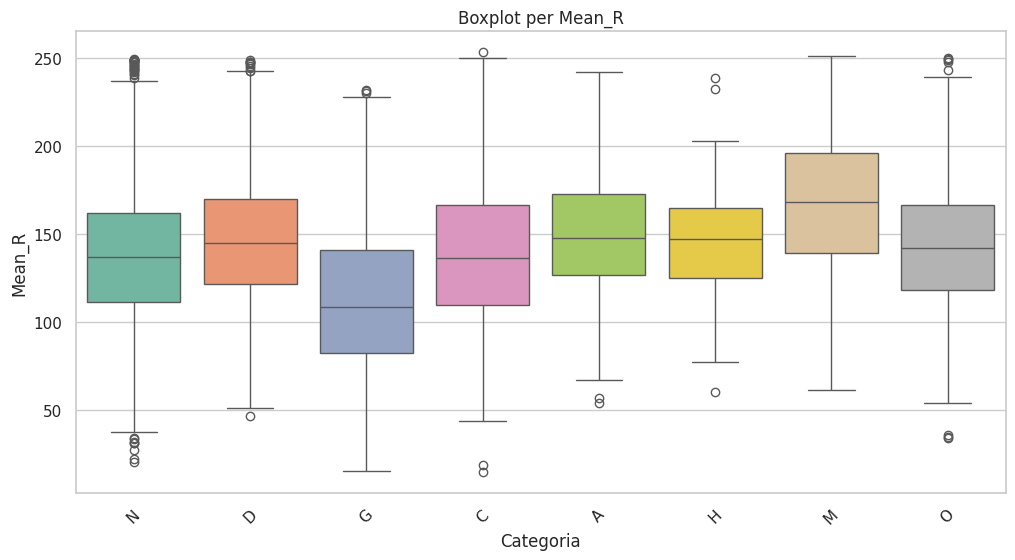

Confronto N vs D: stat=1995948.0000, p-value=4.0995e-14
 -> Differenza significativa tra N e D per Mean_R (p < 0.05)
Confronto N vs G: stat=549377.0000, p-value=4.9029e-22
 -> Differenza significativa tra N e G per Mean_R (p < 0.05)
Confronto N vs C: stat=416617.0000, p-value=7.7415e-01
 -> Nessuna differenza significativa tra N e C per Mean_R
Confronto N vs A: stat=310055.0000, p-value=3.4814e-07
 -> Differenza significativa tra N e A per Mean_R (p < 0.05)
Confronto N vs H: stat=155503.0000, p-value=3.0998e-03
 -> Differenza significativa tra N e H per Mean_R (p < 0.05)
Confronto N vs M: stat=186938.0000, p-value=7.9549e-29
 -> Differenza significativa tra N e M per Mean_R (p < 0.05)
Confronto N vs O: stat=919671.5000, p-value=7.7643e-05
 -> Differenza significativa tra N e O per Mean_R (p < 0.05)
Analisi per il canale: Mean_G


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


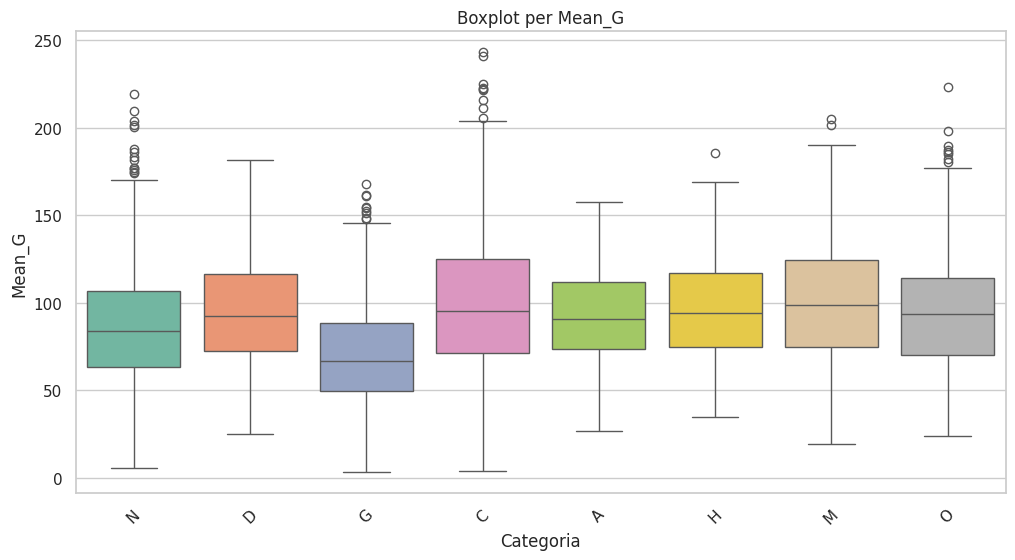

Confronto N vs D: stat=1937728.0000, p-value=3.2653e-19
 -> Differenza significativa tra N e D per Mean_G (p < 0.05)
Confronto N vs G: stat=521869.0000, p-value=7.6625e-15
 -> Differenza significativa tra N e G per Mean_G (p < 0.05)
Confronto N vs C: stat=342145.0000, p-value=1.2684e-07
 -> Differenza significativa tra N e C per Mean_G (p < 0.05)
Confronto N vs A: stat=328185.0000, p-value=1.3715e-04
 -> Differenza significativa tra N e A per Mean_G (p < 0.05)
Confronto N vs H: stat=146504.0000, p-value=9.7839e-05
 -> Differenza significativa tra N e H per Mean_G (p < 0.05)
Confronto N vs M: stat=253654.0000, p-value=1.3504e-09
 -> Differenza significativa tra N e M per Mean_G (p < 0.05)
Confronto N vs O: stat=852391.0000, p-value=2.3570e-11
 -> Differenza significativa tra N e O per Mean_G (p < 0.05)
Analisi per il canale: Mean_B


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


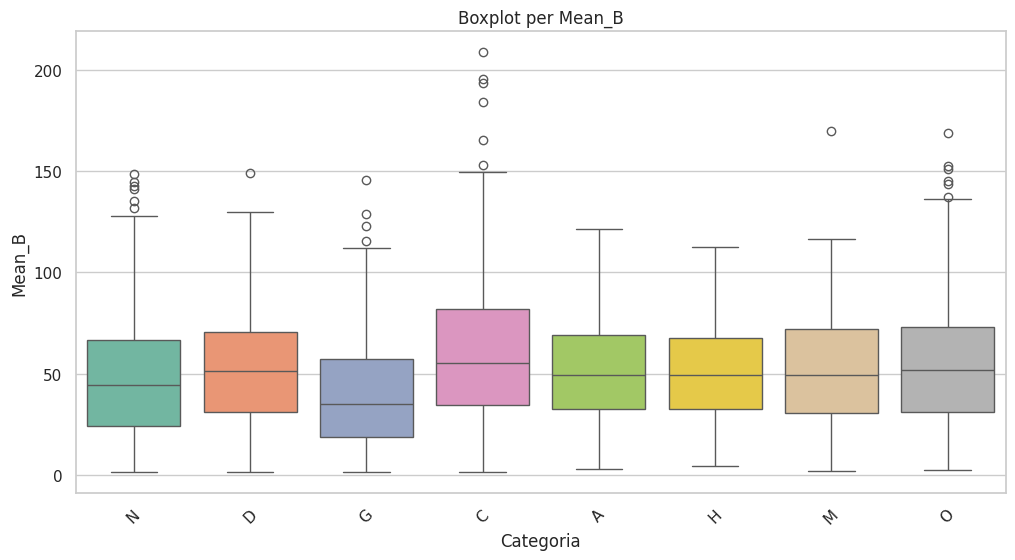

Confronto N vs D: stat=2077072.0000, p-value=2.0845e-08
 -> Differenza significativa tra N e D per Mean_B (p < 0.05)
Confronto N vs G: stat=470078.0000, p-value=2.2485e-05
 -> Differenza significativa tra N e G per Mean_B (p < 0.05)
Confronto N vs C: stat=343226.0000, p-value=1.8800e-07
 -> Differenza significativa tra N e C per Mean_B (p < 0.05)
Confronto N vs A: stat=350974.0000, p-value=2.7686e-02
 -> Differenza significativa tra N e A per Mean_B (p < 0.05)
Confronto N vs H: stat=165138.0000, p-value=5.0804e-02
 -> Nessuna differenza significativa tra N e H per Mean_B
Confronto N vs M: stat=293152.0000, p-value=2.2570e-03
 -> Differenza significativa tra N e M per Mean_B (p < 0.05)
Confronto N vs O: stat=890772.0000, p-value=2.9851e-07
 -> Differenza significativa tra N e O per Mean_B (p < 0.05)
Analisi per il canale: Median_R


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


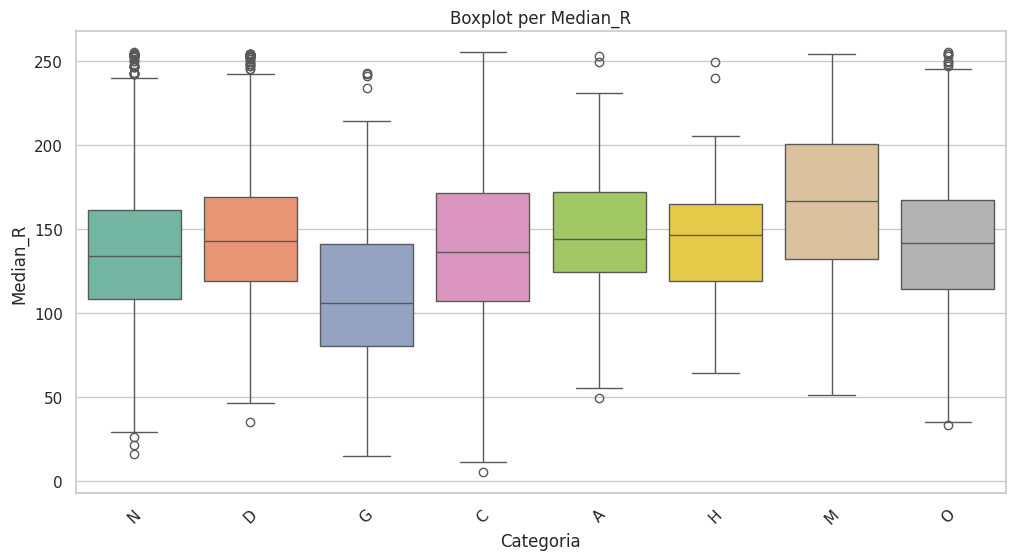

Confronto N vs D: stat=1995718.0000, p-value=3.9209e-14
 -> Differenza significativa tra N e D per Median_R (p < 0.05)
Confronto N vs G: stat=540933.0000, p-value=1.1441e-19
 -> Differenza significativa tra N e G per Median_R (p < 0.05)
Confronto N vs C: stat=401010.5000, p-value=1.8219e-01
 -> Nessuna differenza significativa tra N e C per Median_R
Confronto N vs A: stat=308938.0000, p-value=2.2853e-07
 -> Differenza significativa tra N e A per Median_R (p < 0.05)
Confronto N vs H: stat=158288.5000, p-value=7.6454e-03
 -> Differenza significativa tra N e H per Median_R (p < 0.05)
Confronto N vs M: stat=196409.0000, p-value=2.0116e-25
 -> Differenza significativa tra N e M per Median_R (p < 0.05)
Confronto N vs O: stat=918070.0000, p-value=5.9023e-05
 -> Differenza significativa tra N e O per Median_R (p < 0.05)
Analisi per il canale: Median_G


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


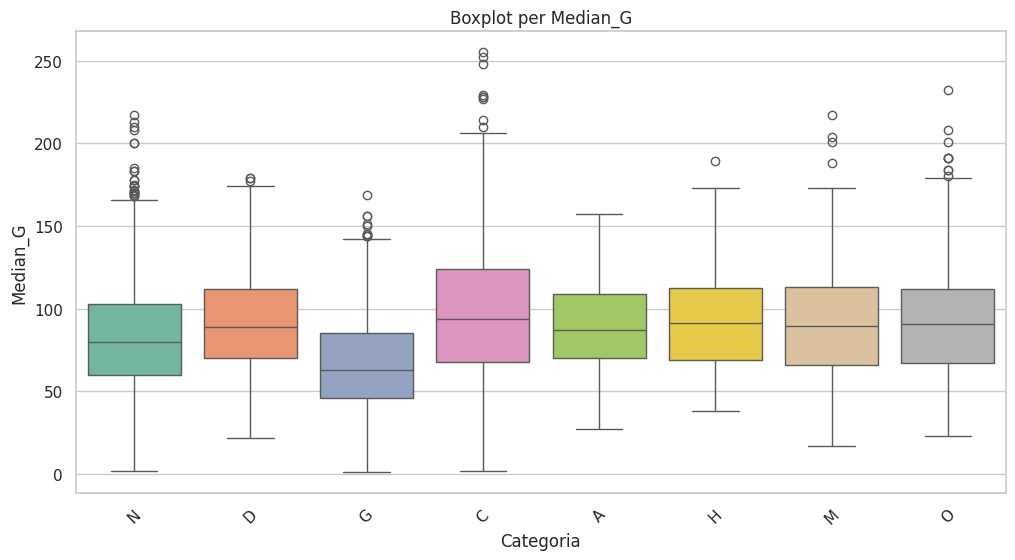

Confronto N vs D: stat=1934549.0000, p-value=1.6200e-19
 -> Differenza significativa tra N e D per Median_G (p < 0.05)
Confronto N vs G: stat=517908.5000, p-value=6.2310e-14
 -> Differenza significativa tra N e G per Median_G (p < 0.05)
Confronto N vs C: stat=335562.0000, p-value=1.0326e-08
 -> Differenza significativa tra N e C per Median_G (p < 0.05)
Confronto N vs A: stat=325663.5000, p-value=6.5584e-05
 -> Differenza significativa tra N e A per Median_G (p < 0.05)
Confronto N vs H: stat=149083.5000, p-value=2.8658e-04
 -> Differenza significativa tra N e H per Median_G (p < 0.05)
Confronto N vs M: stat=286643.5000, p-value=3.8546e-04
 -> Differenza significativa tra N e M per Median_G (p < 0.05)
Confronto N vs O: stat=852899.0000, p-value=2.7066e-11
 -> Differenza significativa tra N e O per Median_G (p < 0.05)
Analisi per il canale: Median_B


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


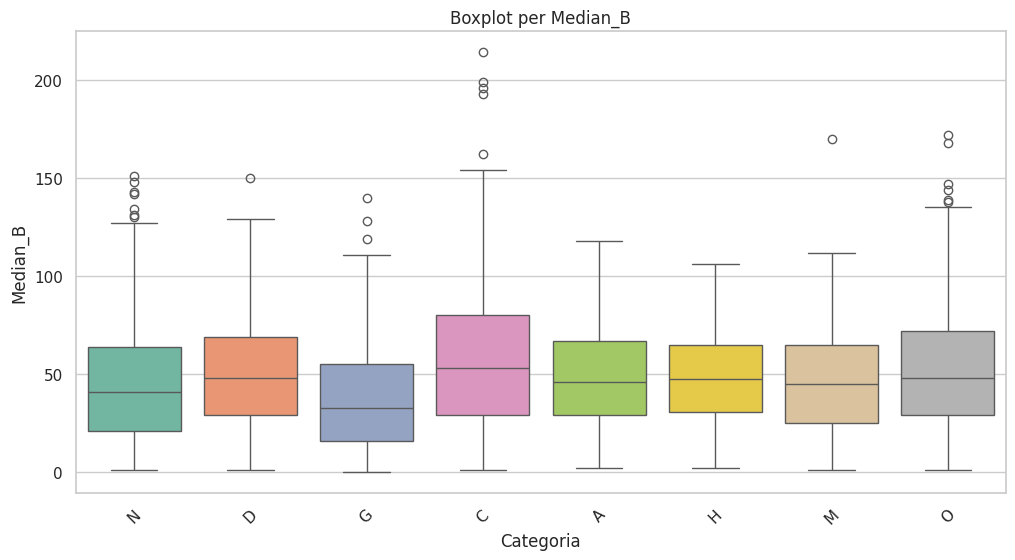

Confronto N vs D: stat=2065553.0000, p-value=4.0405e-09
 -> Differenza significativa tra N e D per Median_B (p < 0.05)
Confronto N vs G: stat=467099.0000, p-value=5.4447e-05
 -> Differenza significativa tra N e G per Median_B (p < 0.05)
Confronto N vs C: stat=344121.0000, p-value=2.5891e-07
 -> Differenza significativa tra N e C per Median_B (p < 0.05)
Confronto N vs A: stat=346381.0000, p-value=1.1515e-02
 -> Differenza significativa tra N e A per Median_B (p < 0.05)
Confronto N vs H: stat=167246.0000, p-value=8.3011e-02
 -> Nessuna differenza significativa tra N e H per Median_B
Confronto N vs M: stat=314619.5000, p-value=1.5565e-01
 -> Nessuna differenza significativa tra N e M per Median_B
Confronto N vs O: stat=891600.0000, p-value=3.5595e-07
 -> Differenza significativa tra N e O per Median_B (p < 0.05)
Analisi per il canale: Std_R


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


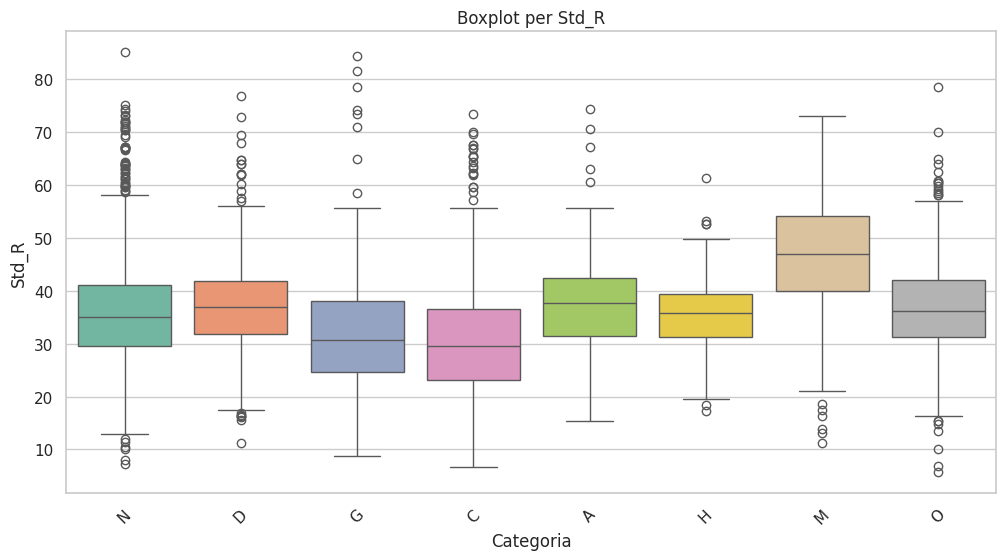

Confronto N vs D: stat=2077357.0000, p-value=2.1687e-08
 -> Differenza significativa tra N e D per Std_R (p < 0.05)
Confronto N vs G: stat=495148.0000, p-value=2.6893e-09
 -> Differenza significativa tra N e G per Std_R (p < 0.05)
Confronto N vs C: stat=539665.0000, p-value=1.6073e-15
 -> Differenza significativa tra N e C per Std_R (p < 0.05)
Confronto N vs A: stat=330732.0000, p-value=2.8000e-04
 -> Differenza significativa tra N e A per Std_R (p < 0.05)
Confronto N vs H: stat=179602.0000, p-value=6.5622e-01
 -> Nessuna differenza significativa tra N e H per Std_R
Confronto N vs M: stat=138764.0000, p-value=1.2945e-49
 -> Differenza significativa tra N e M per Std_R (p < 0.05)
Confronto N vs O: stat=933814.0000, p-value=7.3117e-04
 -> Differenza significativa tra N e O per Std_R (p < 0.05)
Analisi per il canale: Std_G


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


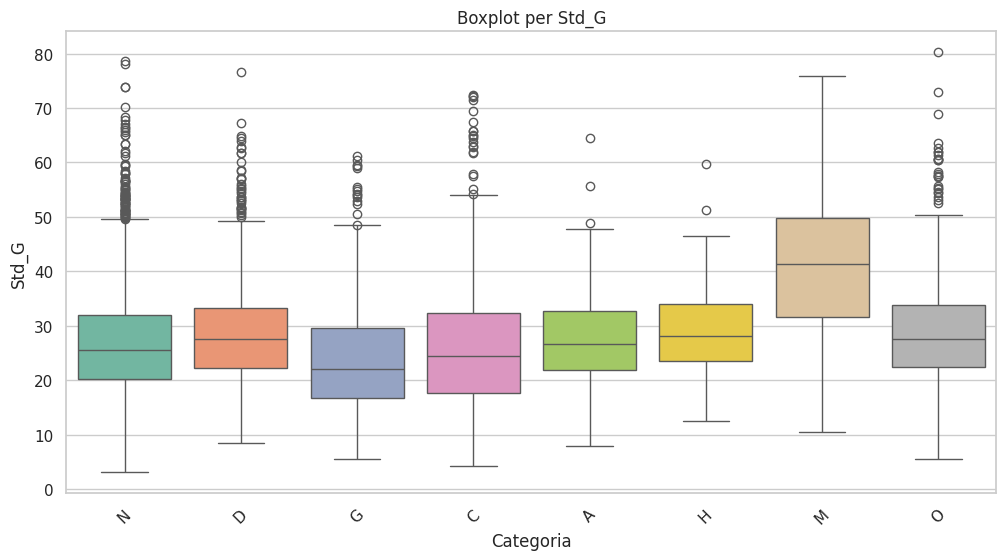

Confronto N vs D: stat=2021267.0000, p-value=3.6978e-12
 -> Differenza significativa tra N e D per Std_G (p < 0.05)
Confronto N vs G: stat=488567.0000, p-value=3.7890e-08
 -> Differenza significativa tra N e G per Std_G (p < 0.05)
Confronto N vs C: stat=446848.0000, p-value=8.1646e-02
 -> Nessuna differenza significativa tra N e C per Std_G
Confronto N vs A: stat=348693.0000, p-value=1.8127e-02
 -> Differenza significativa tra N e A per Std_G (p < 0.05)
Confronto N vs H: stat=149631.0000, p-value=3.5716e-04
 -> Differenza significativa tra N e H per Std_G (p < 0.05)
Confronto N vs M: stat=115341.0000, p-value=8.0163e-62
 -> Differenza significativa tra N e M per Std_G (p < 0.05)
Confronto N vs O: stat=883536.0000, p-value=6.0255e-08
 -> Differenza significativa tra N e O per Std_G (p < 0.05)
Analisi per il canale: Std_B


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


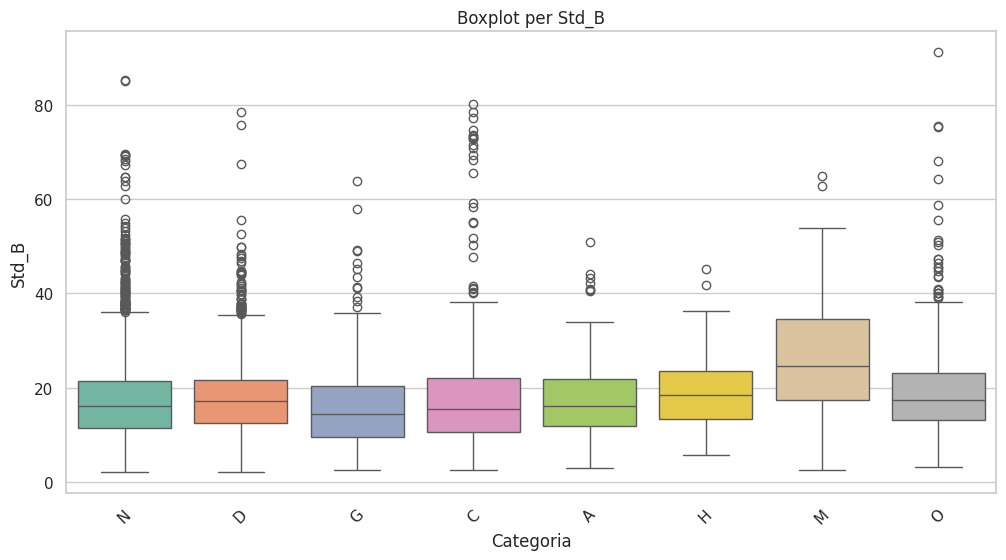

Confronto N vs D: stat=2172528.0000, p-value=9.4350e-04
 -> Differenza significativa tra N e D per Std_B (p < 0.05)
Confronto N vs G: stat=456848.0000, p-value=8.5049e-04
 -> Differenza significativa tra N e G per Std_B (p < 0.05)
Confronto N vs C: stat=427600.0000, p-value=6.5282e-01
 -> Nessuna differenza significativa tra N e C per Std_B
Confronto N vs A: stat=376634.0000, p-value=6.9866e-01
 -> Nessuna differenza significativa tra N e A per Std_B
Confronto N vs H: stat=158845.0000, p-value=9.0746e-03
 -> Differenza significativa tra N e H per Std_B (p < 0.05)
Confronto N vs M: stat=180894.0000, p-value=4.0830e-31
 -> Differenza significativa tra N e M per Std_B (p < 0.05)
Confronto N vs O: stat=905291.0000, p-value=5.7559e-06
 -> Differenza significativa tra N e O per Std_B (p < 0.05)
Analisi per il canale: Skewness_R


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


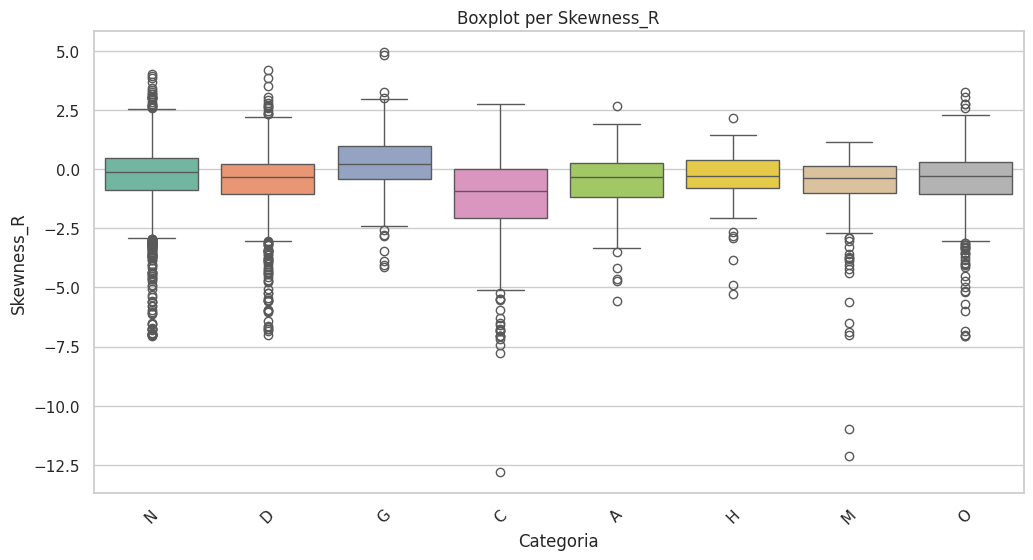

Confronto N vs D: stat=2580492.0000, p-value=7.3007e-11
 -> Differenza significativa tra N e D per Skewness_R (p < 0.05)
Confronto N vs G: stat=314711.0000, p-value=1.9662e-10
 -> Differenza significativa tra N e G per Skewness_R (p < 0.05)
Confronto N vs C: stat=570232.0000, p-value=1.2553e-23
 -> Differenza significativa tra N e C per Skewness_R (p < 0.05)
Confronto N vs A: stat=435919.0000, p-value=1.4170e-04
 -> Differenza significativa tra N e A per Skewness_R (p < 0.05)
Confronto N vs H: stat=193268.0000, p-value=3.2730e-01
 -> Nessuna differenza significativa tra N e H per Skewness_R
Confronto N vs M: stat=387887.0000, p-value=3.2060e-05
 -> Differenza significativa tra N e M per Skewness_R (p < 0.05)
Confronto N vs O: stat=1121824.0000, p-value=2.1155e-05
 -> Differenza significativa tra N e O per Skewness_R (p < 0.05)
Analisi per il canale: Skewness_G


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


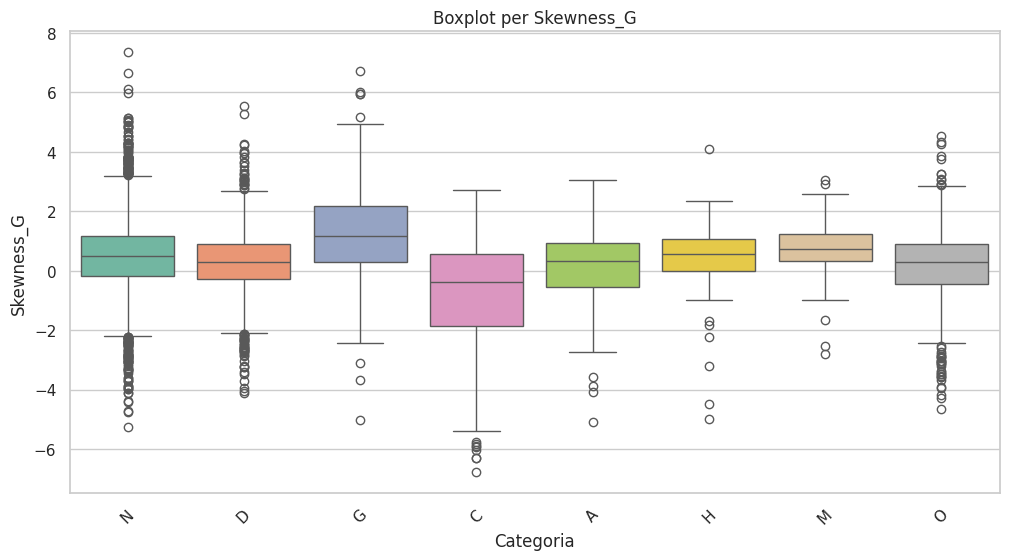

Confronto N vs D: stat=2546141.0000, p-value=1.2900e-08
 -> Differenza significativa tra N e D per Skewness_G (p < 0.05)
Confronto N vs G: stat=287767.0000, p-value=2.3505e-16
 -> Differenza significativa tra N e G per Skewness_G (p < 0.05)
Confronto N vs C: stat=592991.0000, p-value=7.7237e-31
 -> Differenza significativa tra N e C per Skewness_G (p < 0.05)
Confronto N vs A: stat=426624.0000, p-value=1.6446e-03
 -> Differenza significativa tra N e A per Skewness_G (p < 0.05)
Confronto N vs H: stat=179234.0000, p-value=6.2874e-01
 -> Nessuna differenza significativa tra N e H per Skewness_G
Confronto N vs M: stat=278804.0000, p-value=3.3757e-05
 -> Differenza significativa tra N e M per Skewness_G (p < 0.05)
Confronto N vs O: stat=1148946.0000, p-value=8.6493e-08
 -> Differenza significativa tra N e O per Skewness_G (p < 0.05)
Analisi per il canale: Skewness_B


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


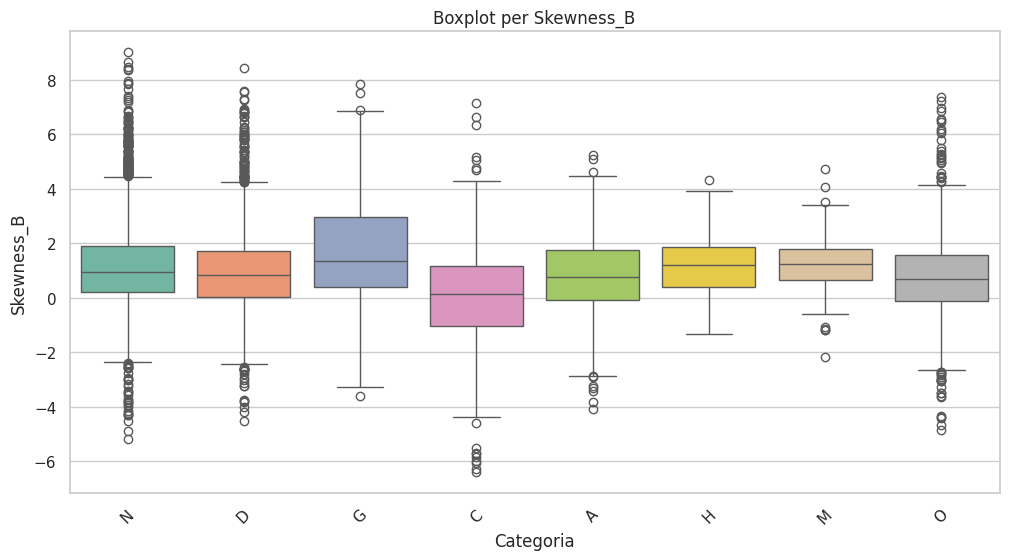

Confronto N vs D: stat=2449076.0000, p-value=8.0616e-04
 -> Differenza significativa tra N e D per Skewness_B (p < 0.05)
Confronto N vs G: stat=339979.0000, p-value=3.4909e-06
 -> Differenza significativa tra N e G per Skewness_B (p < 0.05)
Confronto N vs C: stat=564414.0000, p-value=6.0402e-22
 -> Differenza significativa tra N e C per Skewness_B (p < 0.05)
Confronto N vs A: stat=418877.0000, p-value=9.3211e-03
 -> Differenza significativa tra N e A per Skewness_B (p < 0.05)
Confronto N vs H: stat=169784.0000, p-value=1.4190e-01
 -> Nessuna differenza significativa tra N e H per Skewness_B
Confronto N vs M: stat=299932.0000, p-value=1.1150e-02
 -> Differenza significativa tra N e M per Skewness_B (p < 0.05)
Confronto N vs O: stat=1146770.0000, p-value=1.4040e-07
 -> Differenza significativa tra N e O per Skewness_B (p < 0.05)
Analisi per il canale: Kurtosis_R


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


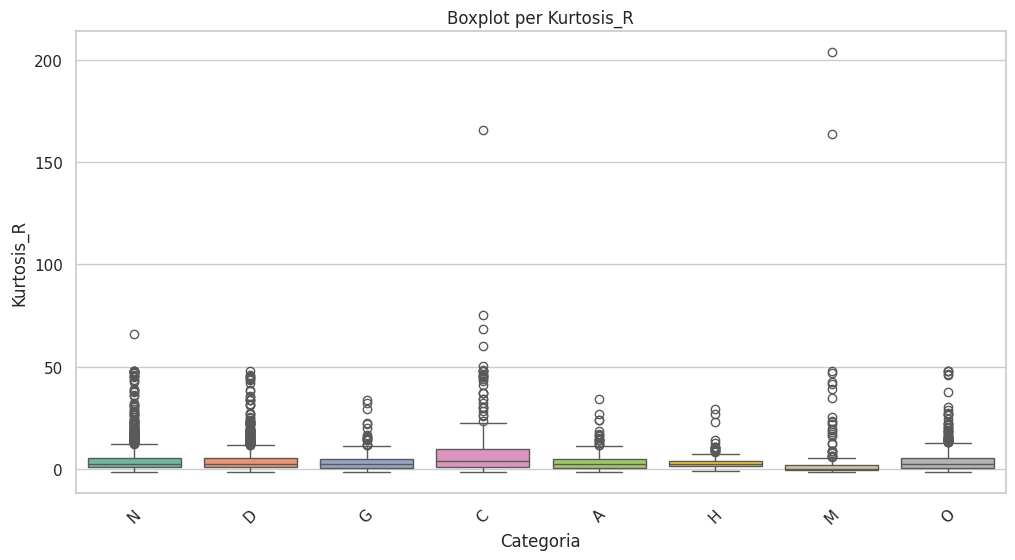

Confronto N vs D: stat=2268887.0000, p-value=3.2358e-01
 -> Nessuna differenza significativa tra N e D per Kurtosis_R
Confronto N vs G: stat=417719.0000, p-value=5.0571e-01
 -> Nessuna differenza significativa tra N e G per Kurtosis_R
Confronto N vs C: stat=341456.0000, p-value=9.8438e-08
 -> Differenza significativa tra N e C per Kurtosis_R (p < 0.05)
Confronto N vs A: stat=401572.0000, p-value=1.6873e-01
 -> Nessuna differenza significativa tra N e A per Kurtosis_R
Confronto N vs H: stat=175337.0000, p-value=3.7358e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_R
Confronto N vs M: stat=476304.0000, p-value=1.2885e-27
 -> Differenza significativa tra N e M per Kurtosis_R (p < 0.05)
Confronto N vs O: stat=1035350.0000, p-value=4.5750e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_R
Analisi per il canale: Kurtosis_G


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


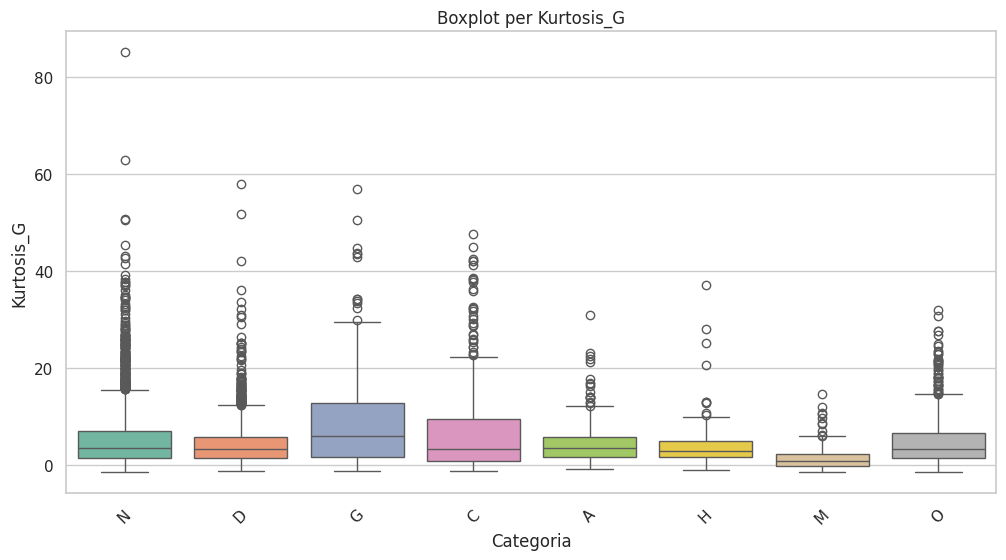

Confronto N vs D: stat=2416477.0000, p-value=1.0291e-02
 -> Differenza significativa tra N e D per Kurtosis_G (p < 0.05)
Confronto N vs G: stat=328321.0000, p-value=5.4743e-08
 -> Differenza significativa tra N e G per Kurtosis_G (p < 0.05)
Confronto N vs C: stat=422253.0000, p-value=9.2741e-01
 -> Nessuna differenza significativa tra N e C per Kurtosis_G
Confronto N vs A: stat=389061.0000, p-value=6.2302e-01
 -> Nessuna differenza significativa tra N e A per Kurtosis_G
Confronto N vs H: stat=196488.0000, p-value=1.8842e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_G
Confronto N vs M: stat=502523.0000, p-value=5.3967e-38
 -> Differenza significativa tra N e M per Kurtosis_G (p < 0.05)
Confronto N vs O: stat=1045534.0000, p-value=2.4757e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_G
Analisi per il canale: Kurtosis_B


<ipython-input-24-752c9f7639c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


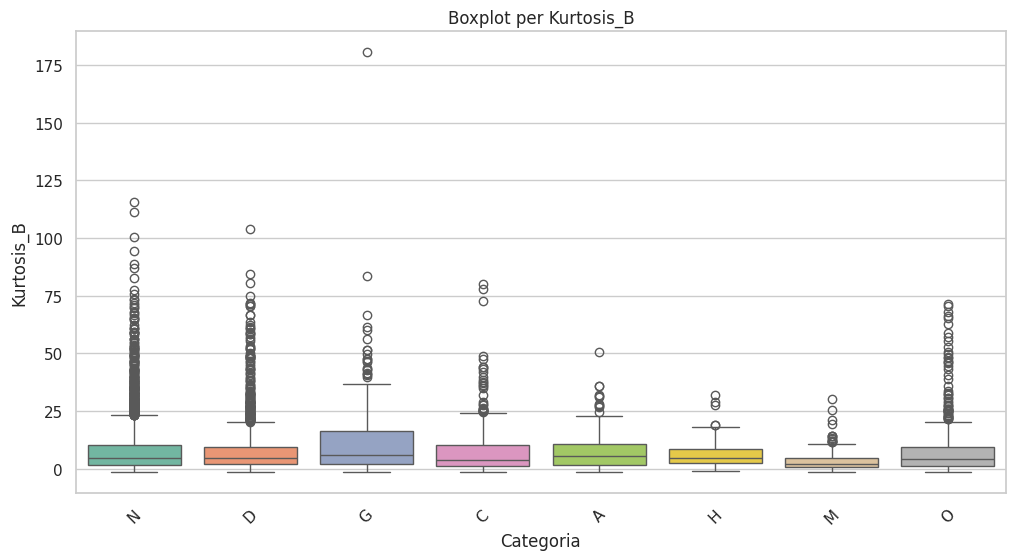

Confronto N vs D: stat=2254127.0000, p-value=1.7945e-01
 -> Nessuna differenza significativa tra N e D per Kurtosis_B
Confronto N vs G: stat=360328.0000, p-value=1.1503e-03
 -> Differenza significativa tra N e G per Kurtosis_B (p < 0.05)
Confronto N vs C: stat=433562.0000, p-value=3.9541e-01
 -> Nessuna differenza significativa tra N e C per Kurtosis_B
Confronto N vs A: stat=374267.0000, p-value=5.7922e-01
 -> Nessuna differenza significativa tra N e A per Kurtosis_B
Confronto N vs H: stat=181697.0000, p-value=8.2065e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_B
Confronto N vs M: stat=430540.0000, p-value=1.3050e-13
 -> Differenza significativa tra N e M per Kurtosis_B (p < 0.05)
Confronto N vs O: stat=1050714.0000, p-value=1.7179e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_B


In [24]:
# Funzione per creare boxplot e calcolare test statistici
def analyze_channel(df, channel, categories):
    print(f"Analisi per il canale: {channel}")

    # Creazione del boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')
    plt.title(f'Boxplot per {channel}')
    plt.xlabel('Categoria')
    plt.ylabel(channel)
    plt.xticks(rotation=45)
    plt.show()

    # Confronto tra Normale (N) e ciascuna patologia
    normal_values = df[df['Category'] == 'N'][channel].dropna()
    for category in categories:
        if category == 'N':
            continue
        category_values = df[df['Category'] == category][channel].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(normal_values, category_values, alternative='two-sided')
        print(f"Confronto N vs {category}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra N e {category} per {channel} (p < 0.05)")
        else:
            print(f" -> Nessuna differenza significativa tra N e {category} per {channel}")

# Analisi per ciascun canale RGB
for channel in channels:
    analyze_channel(RGB_df, channel, categories)




---

# TEXTURE DESCRIPTORS

In [ ]:
#TEXTURE DESCRIPTORS
#entropia
from skimage import io
from skimage.color import rgb2gray
import os

def calculate_entropy_and_histogram(image):
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    # Normalize the histogram
    hist_norm = hist / hist.sum()
    # Remove zero probabilities
    hist_norm = hist_norm[hist_norm > 0]
    # Calculate entropy
    entropy = -np.sum(hist_norm * np.log2(hist_norm))
    return entropy

# Calcola l'entropia per tutte le immagini
entropy_results = []

for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img_gray=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    img_entropy = calculate_entropy_and_histogram(img_gray)
    entropy_results.append({'Category': category, 'Image': file, 'Entropy': img_entropy})

# Salva i risultati in un DataFrame
entropy_df = pd.DataFrame(entropy_results)

# Salva su CSV per future analisi
entropy_df.to_csv('entropy_results.csv', index=False)
print("Entropia calcolata e salvata in entropy_results.csv.")

print(entropy_df.head())

Entropia calcolata e salvata in entropy_results.csv.
  Category         Image   Entropy
0        N   0_right.jpg  5.153260
1        N   1_right.jpg  6.167973
2        N   8_right.jpg  6.255137
3        N  10_right.jpg  5.606169
4        N  29_right.jpg  6.001006


In [ ]:
# Test di Shapiro-Wilk per ciascuna categoria
shapiro_results = []

# Raggruppa le entropie per categoria
for category in entropy_df['Category'].unique():
    category_entropy = entropy_df[entropy_df['Category'] == category]['Entropy']
    stat, p_value = shapiro(category_entropy)
    shapiro_results.append({'Category': category, 'Shapiro_Stat': stat, 'P_Value': p_value})
    print(f"Test di Shapiro-Wilk per categoria {category}: Stat = {stat:.4f}, P-value = {p_value:.4f}")
    if p_value > 0.05:
        print(f"  La distribuzione per {category} è normale (p-value > 0.05).\n")
    else:
        print(f"  La distribuzione per {category} NON è normale (p-value <= 0.05).\n")


Test di Shapiro-Wilk per categoria N: Stat = 0.9906, P-value = 0.0000
  La distribuzione per N NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria D: Stat = 0.9873, P-value = 0.0000
  La distribuzione per D NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria G: Stat = 0.9938, P-value = 0.3001
  La distribuzione per G è normale (p-value > 0.05).

Test di Shapiro-Wilk per categoria C: Stat = 0.9824, P-value = 0.0011
  La distribuzione per C NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria A: Stat = 0.9890, P-value = 0.0401
  La distribuzione per A NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria H: Stat = 0.9740, P-value = 0.0144
  La distribuzione per H NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria M: Stat = 0.9832, P-value = 0.0076
  La distribuzione per M NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria O: Stat = 0.9820, P-value = 0.0000
  La distribuzione per O NON è n

Analisi per l'entropia


<ipython-input-17-93ea501d37b6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Entropy', data=df, order=categories, palette='Set3')


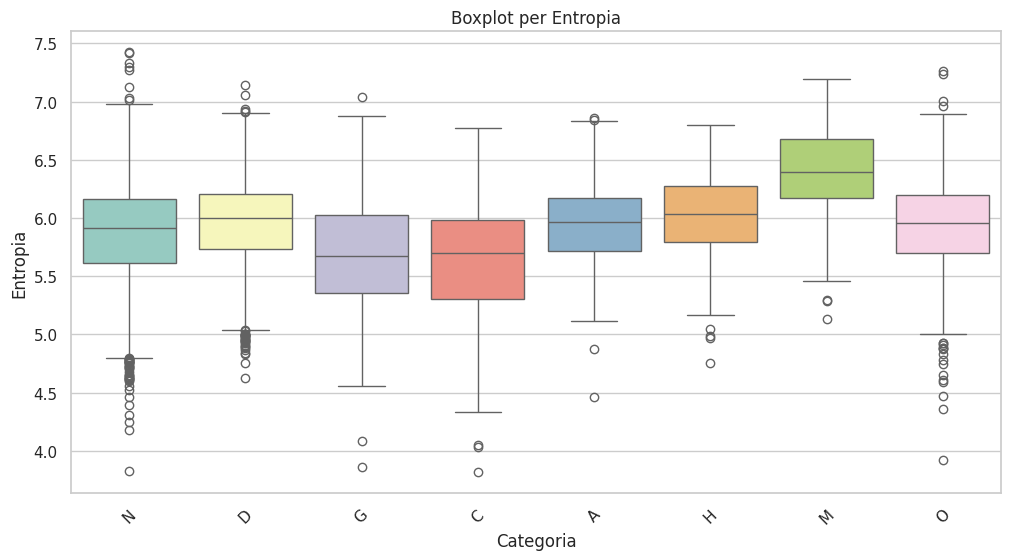

Confronto N vs D: stat=2020417.5000, p-value=3.1982e-12
 -> Differenza significativa tra N e D per Entropia (p < 0.05)
Confronto N vs G: stat=502302.0000, p-value=1.2127e-10
 -> Differenza significativa tra N e G per Entropia (p < 0.05)
Confronto N vs C: stat=531109.5000, p-value=1.4203e-13
 -> Differenza significativa tra N e C per Entropia (p < 0.05)
Confronto N vs A: stat=345081.0000, p-value=8.8334e-03
 -> Differenza significativa tra N e A per Entropia (p < 0.05)
Confronto N vs H: stat=144787.0000, p-value=4.6034e-05
 -> Differenza significativa tra N e H per Entropia (p < 0.05)
Confronto N vs M: stat=108332.5000, p-value=9.6312e-66
 -> Differenza significativa tra N e M per Entropia (p < 0.05)
Confronto N vs O: stat=926130.0000, p-value=2.2474e-04
 -> Differenza significativa tra N e O per Entropia (p < 0.05)


In [ ]:
from scipy.stats import mannwhitneyu
entropy_results_betweencat=[]
def analyze_entropy(df, categories):
    print("Analisi per l'entropia")

    # Creazione del boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y='Entropy', data=df, order=categories, palette='Set3')
    plt.title('Boxplot per Entropia')
    plt.xlabel('Categoria')
    plt.ylabel('Entropia')
    plt.xticks(rotation=45)
    plt.show()

    # Confronto tra Normale (N) e ciascuna patologia
    normal_values = df[df['Category'] == 'N']['Entropy'].dropna()
    for category in categories:
        if category == 'N':
            continue
        category_values = df[df['Category'] == category]['Entropy'].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(normal_values, category_values, alternative='two-sided')
        print(f"Confronto N vs {category}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra N e {category} per Entropia (p < 0.05)")
        else:
            print(f" -> Nessuna differenza significativa tra N e {category} per Entropia")
        entropy_results_betweencat.append({'Category': category, 'p-value':p_value})
# Chiamata della funzione per analizzare l'entropia
analyze_entropy(entropy_df, categories)

# Salva i risultati in un DataFrame
entropy_pvalue_df = pd.DataFrame(entropy_results_betweencat)

# Salva su CSV per future analisi
entropy_pvalue_df.to_csv('entropy_results_betweencat.csv', index=False)

In [ ]:
files.download('entropy_results_betweencat.csv')

In [ ]:
#CONFRONTO TRA LE MALATTIE


'''from itertools import combinations
from scipy.stats import mannwhitneyu

def analyze_entropy_all_pairs(df, categories):
    print("Confronti tra tutte le categorie per l'entropia\n")

    # Creazione dei confronti a coppie
    for cat1, cat2 in combinations(categories, 2):
        values_cat1 = df[df['Category'] == cat1]['Entropy'].dropna()
        values_cat2 = df[df['Category'] == cat2]['Entropy'].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(values_cat1, values_cat2, alternative='two-sided')

        # Stampa dei risultati
        print(f"Confronto {cat1} vs {cat2}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra {cat1} e {cat2} (p < 0.05)\n")
        else:
            print(f" -> Nessuna differenza significativa tra {cat1} e {cat2}\n")
# Esegui il confronto tra tutte le categorie
analyze_entropy_all_pairs(entropy_df, categories)'''



---
# GLCM


In [ ]:
#GLCM
from skimage.feature import graycomatrix, graycoprops
'''
# GLCM parameters
distances = [1, 2, 3]  # Distances between pixel pairs
angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Angles (0°, 45°, 90°, 135°)

def calculate_glcm_features(image, distances, angles, levels=8):
    features = {}
    """
    Calculate GLCM and extract texture features.

    Parameters:
        - image: Grayscale input image
        - distances: List of pixel pair distances for GLCM computation
        - angles: List of angles (in radians) for GLCM computation
        - levels: Number of gray levels in the image
    Returns:
        - features: Dictionary with GLCM features (contrast, correlation, energy, homogeneity)
    """
    for d in distances:
        for a in angles:
            # Calcola GLCM per ogni combinazione di distanza e angolo
            glcm = graycomatrix(image, distances=[d], angles=[a], levels=levels, symmetric=True, normed=True)
            angle_str = f"{np.degrees(a):.1f}"
            # Estrai le features e aggiungi al dizionario con chiavi uniche
            features[f'contrast_d{d}_a{angle_str}'] = graycoprops(glcm, 'contrast')[0, 0]
            features[f'correlation_d{d}_a{angle_str}'] = graycoprops(glcm, 'correlation')[0, 0]
            features[f'energy_d{d}_a{angle_str}'] = graycoprops(glcm, 'energy')[0, 0]
            features[f'homogeneity_d{d}_a{angle_str}'] = graycoprops(glcm, 'homogeneity')[0, 0]

    return features

# DataFrame per memorizzare le feature GLCM
columns = ['Image', 'Category'] + [f"{stat}_d{d}_a{angle}"
                                   for d in distances
                                   for angle in [f"{np.degrees(a):.1f}" for a in angles]
                                   for stat in ['contrast', 'correlation', 'energy', 'homogeneity']]
rows =[]

# Loop sulle immagini
for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr = cv2.imread(immaginipath + '/' + file, cv2.IMREAD_COLOR)

    # Preprocessamento immagine
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    normalized_image = (img_gray / (256 // 8)).astype('uint8')

    # Calcolo delle feature GLCM
    features_glcm = calculate_glcm_features(normalized_image, distances, angles)

    # Aggiungi i risultati
    row = {'Image': file, 'Category': category}
    row.update(features_glcm)  # Aggiungi le feature calcolate
    rows.append(row)

glcm_df = pd.DataFrame(rows, columns=columns)
'''
distances = [1, 2, 3]  # Distances between pixel pairs
angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Angles (0°, 45°, 90°, 135°)

def calculate_glcm_features(image, distances, angles, levels=8):
    """
    Calculate GLCM and extract texture features.

    Parameters:
        - image: Grayscale input image
        - distances: List of pixel pair distances for GLCM computation
        - angles: List of angles (in radians) for GLCM computation
        - levels: Number of gray levels in the image
    Returns:
        - averaged_features: Dictionary with the average values of GLCM features
    """
    features = {'contrast': [], 'correlation': [], 'energy': [], 'homogeneity': []}

    for d in distances:
        for a in angles:
            # Calculate GLCM for each combination of distance and angle
            glcm = graycomatrix(image, distances=[d], angles=[a], levels=levels, symmetric=True, normed=True)

            # Append each feature to the respective list
            features['contrast'].append(graycoprops(glcm, 'contrast')[0, 0])
            features['correlation'].append(graycoprops(glcm, 'correlation')[0, 0])
            features['energy'].append(graycoprops(glcm, 'energy')[0, 0])
            features['homogeneity'].append(graycoprops(glcm, 'homogeneity')[0, 0])

    # Compute the average for each feature
    averaged_features = {key: np.mean(value) for key, value in features.items()}

    return averaged_features

# DataFrame to store GLCM features
columns = ['Image', 'Category', 'contrast_mean', 'correlation_mean', 'energy_mean', 'homogeneity_mean']
rows = []

# Loop through the images
for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
    for file in images:
        img_bgr = cv2.imread(immaginipath + '/' + file, cv2.IMREAD_COLOR)

        # Preprocess the image
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        normalized_image = (img_gray / (256 // 8)).astype('uint8')

        # Calculate GLCM features
        features_glcm = calculate_glcm_features(normalized_image, distances, angles)

        # Add results to the rows list
        row = {
            'Image': file,
            'Category': category,
            'contrast_mean': features_glcm['contrast'],
            'correlation_mean': features_glcm['correlation'],
            'energy_mean': features_glcm['energy'],
            'homogeneity_mean': features_glcm['homogeneity']
        }
        rows.append(row)

# Create the DataFrame
glcm_df = pd.DataFrame(rows, columns=columns)


In [ ]:
print(glcm_df.head())

          Image Category  contrast_mean  correlation_mean  energy_mean  \
0   0_right.jpg        N       0.035954          0.959683     0.632553   
1   1_right.jpg        N       0.145346          0.973464     0.458642   
2   8_right.jpg        N       0.127592          0.965374     0.444274   
3  10_right.jpg        N       0.147923          0.956655     0.582288   
4  29_right.jpg        N       0.106885          0.955098     0.493474   

   homogeneity_mean  
0          0.985023  
1          0.943730  
2          0.944903  
3          0.956199  
4          0.969732  


In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_results = []
channel_glcm=['contrast_mean', 'correlation_mean', 'energy_mean', 'homogeneity_mean']
for feature in channel_glcm:
    category_data = glcm_df[glcm_df['Category'] == category]
    print('\n')
    for category in glcm_df['Category'].unique():
        stat, p_value = shapiro(category_data[feature])
        shapiro_results.append({
            'Category': category,
            'Feature': feature,
            'Statistic': stat,
            'p_value': p_value
        })
        print(f"Shapiro-Wilk Test for {feature} in {category}: Statistic={stat:.4f}, p-value={p_value:.4e}")
        if p_value > 0.05:
            print(f"  The distribution for {category} in {feature} is normal (p-value > 0.05).\n")




Shapiro-Wilk Test for contrast_mean in N: Statistic=0.9414, p-value=4.2510e-16
Shapiro-Wilk Test for contrast_mean in D: Statistic=0.9414, p-value=4.2510e-16
Shapiro-Wilk Test for contrast_mean in G: Statistic=0.9414, p-value=4.2510e-16
Shapiro-Wilk Test for contrast_mean in C: Statistic=0.9414, p-value=4.2510e-16
Shapiro-Wilk Test for contrast_mean in A: Statistic=0.9414, p-value=4.2510e-16
Shapiro-Wilk Test for contrast_mean in H: Statistic=0.9414, p-value=4.2510e-16
Shapiro-Wilk Test for contrast_mean in M: Statistic=0.9414, p-value=4.2510e-16
Shapiro-Wilk Test for contrast_mean in O: Statistic=0.9414, p-value=4.2510e-16


Shapiro-Wilk Test for correlation_mean in N: Statistic=0.8176, p-value=1.4505e-27
Shapiro-Wilk Test for correlation_mean in D: Statistic=0.8176, p-value=1.4505e-27
Shapiro-Wilk Test for correlation_mean in G: Statistic=0.8176, p-value=1.4505e-27
Shapiro-Wilk Test for correlation_mean in C: Statistic=0.8176, p-value=1.4505e-27
Shapiro-Wilk Test for correlation_me



Mann-Whitney U Test Results:


Comparison: Normal vs D for contrast_mean
  Mann-Whitney U Test: Statistic=2028921.0000, p-value=1.3422e-11
 -> Differenza significativa tra N e D per contrast_mean (p < 0.05)

Comparison: Normal vs G for contrast_mean
  Mann-Whitney U Test: Statistic=522519.0000, p-value=5.3927e-15
 -> Differenza significativa tra N e G per contrast_mean (p < 0.05)

Comparison: Normal vs C for contrast_mean
  Mann-Whitney U Test: Statistic=434406.0000, p-value=3.6469e-01
 -> Nessuna differenza significativa tra N e C per contrast_mean
Comparison: Normal vs A for contrast_mean
  Mann-Whitney U Test: Statistic=343580.0000, p-value=6.4384e-03
 -> Differenza significativa tra N e A per contrast_mean (p < 0.05)

Comparison: Normal vs H for contrast_mean
  Mann-Whitney U Test: Statistic=147108.0000, p-value=1.2663e-04
 -> Differenza significativa tra N e H per contrast_mean (p < 0.05)

Comparison: Normal vs M for contrast_mean
  Mann-Whitney U Test: Statistic=275026.0000, p-

<ipython-input-39-a867843bcd51>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=feature, data=glcm_df, order=glcm_df['Category'].unique(), palette='Set2')


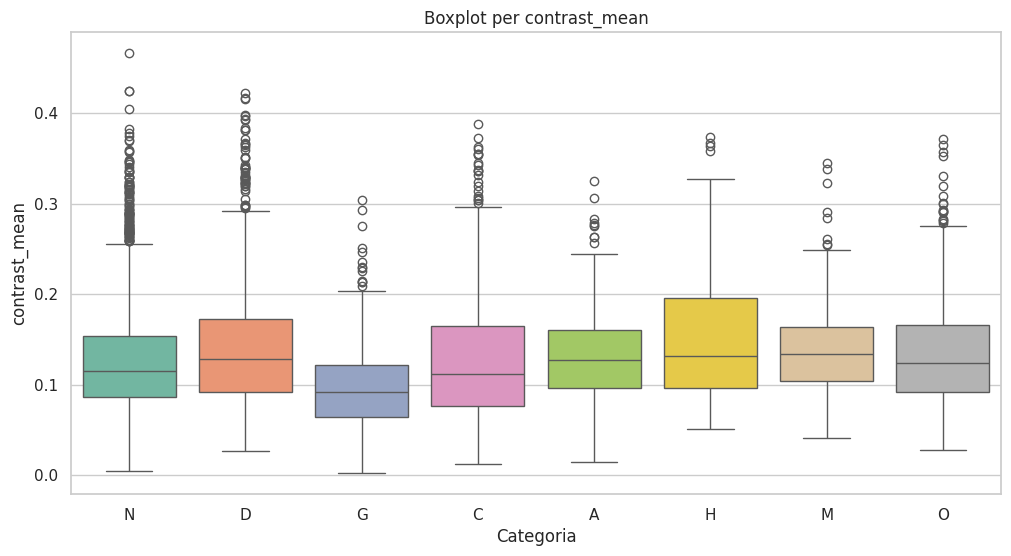



Comparison: Normal vs D for correlation_mean
  Mann-Whitney U Test: Statistic=2110990.0000, p-value=1.6819e-06
 -> Differenza significativa tra N e D per correlation_mean (p < 0.05)

Comparison: Normal vs G for correlation_mean
  Mann-Whitney U Test: Statistic=461418.0000, p-value=2.6461e-04
 -> Differenza significativa tra N e G per correlation_mean (p < 0.05)

Comparison: Normal vs C for correlation_mean
  Mann-Whitney U Test: Statistic=312143.0000, p-value=2.9595e-13
 -> Differenza significativa tra N e C per correlation_mean (p < 0.05)

Comparison: Normal vs A for correlation_mean
  Mann-Whitney U Test: Statistic=325339.0000, p-value=5.9570e-05
 -> Differenza significativa tra N e A per correlation_mean (p < 0.05)

Comparison: Normal vs H for correlation_mean
  Mann-Whitney U Test: Statistic=185624.0000, p-value=8.5510e-01
 -> Nessuna differenza significativa tra N e H per correlation_mean
Comparison: Normal vs M for correlation_mean
  Mann-Whitney U Test: Statistic=159315.0000, 

<ipython-input-39-a867843bcd51>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=feature, data=glcm_df, order=glcm_df['Category'].unique(), palette='Set2')


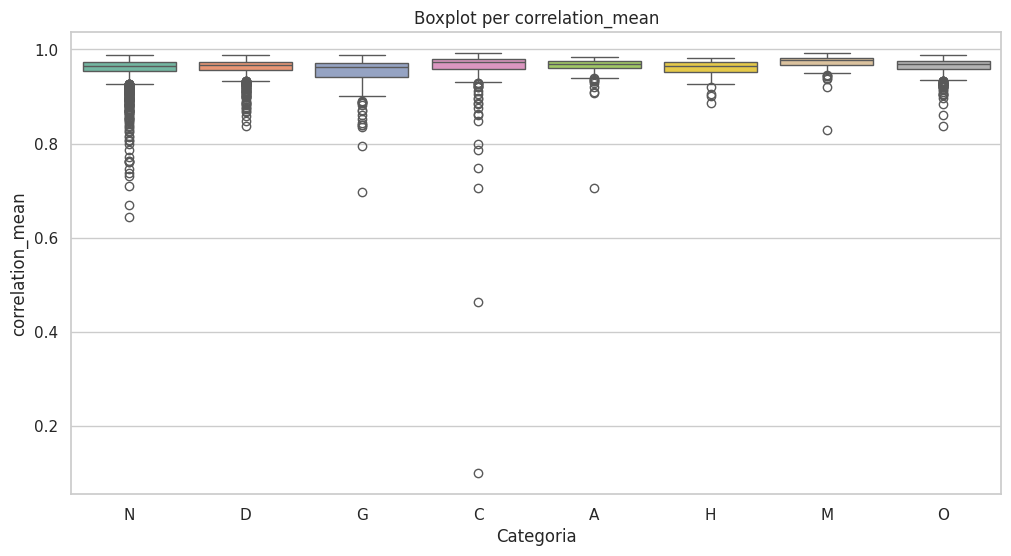



Comparison: Normal vs D for energy_mean
  Mann-Whitney U Test: Statistic=2678038.0000, p-value=7.8138e-19
 -> Differenza significativa tra N e D per energy_mean (p < 0.05)

Comparison: Normal vs G for energy_mean
  Mann-Whitney U Test: Statistic=280185.0000, p-value=2.7792e-18
 -> Differenza significativa tra N e G per energy_mean (p < 0.05)

Comparison: Normal vs C for energy_mean
  Mann-Whitney U Test: Statistic=318728.0000, p-value=7.1597e-12
 -> Differenza significativa tra N e C per energy_mean (p < 0.05)

Comparison: Normal vs A for energy_mean
  Mann-Whitney U Test: Statistic=424247.0000, p-value=2.8844e-03
 -> Differenza significativa tra N e A per energy_mean (p < 0.05)

Comparison: Normal vs H for energy_mean
  Mann-Whitney U Test: Statistic=221494.0000, p-value=8.7682e-05
 -> Differenza significativa tra N e H per energy_mean (p < 0.05)

Comparison: Normal vs M for energy_mean
  Mann-Whitney U Test: Statistic=528188.0000, p-value=8.0777e-50
 -> Differenza significativa tra

<ipython-input-39-a867843bcd51>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=feature, data=glcm_df, order=glcm_df['Category'].unique(), palette='Set2')


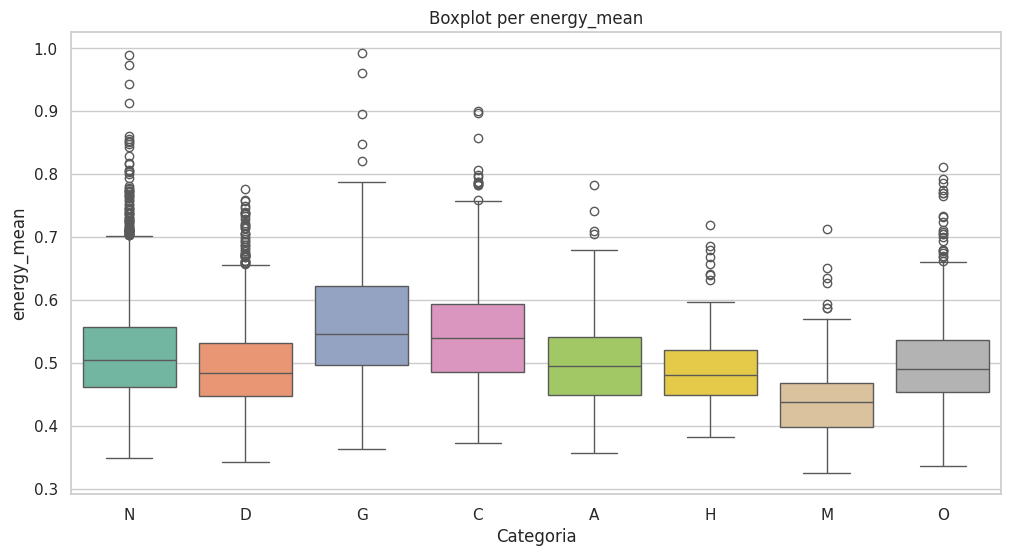



Comparison: Normal vs D for homogeneity_mean
  Mann-Whitney U Test: Statistic=2561621.0000, p-value=1.3608e-09
 -> Differenza significativa tra N e D per homogeneity_mean (p < 0.05)

Comparison: Normal vs G for homogeneity_mean
  Mann-Whitney U Test: Statistic=287423.0000, p-value=1.9329e-16
 -> Differenza significativa tra N e G per homogeneity_mean (p < 0.05)

Comparison: Normal vs C for homogeneity_mean
  Mann-Whitney U Test: Statistic=188917.0000, p-value=1.2867e-54
 -> Differenza significativa tra N e C per homogeneity_mean (p < 0.05)

Comparison: Normal vs A for homogeneity_mean
  Mann-Whitney U Test: Statistic=404023.0000, p-value=1.2123e-01
 -> Nessuna differenza significativa tra N e A per homogeneity_mean
Comparison: Normal vs H for homogeneity_mean
  Mann-Whitney U Test: Statistic=229962.0000, p-value=1.5457e-06
 -> Differenza significativa tra N e H per homogeneity_mean (p < 0.05)

Comparison: Normal vs M for homogeneity_mean
  Mann-Whitney U Test: Statistic=408255.0000, 

<ipython-input-39-a867843bcd51>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=feature, data=glcm_df, order=glcm_df['Category'].unique(), palette='Set2')


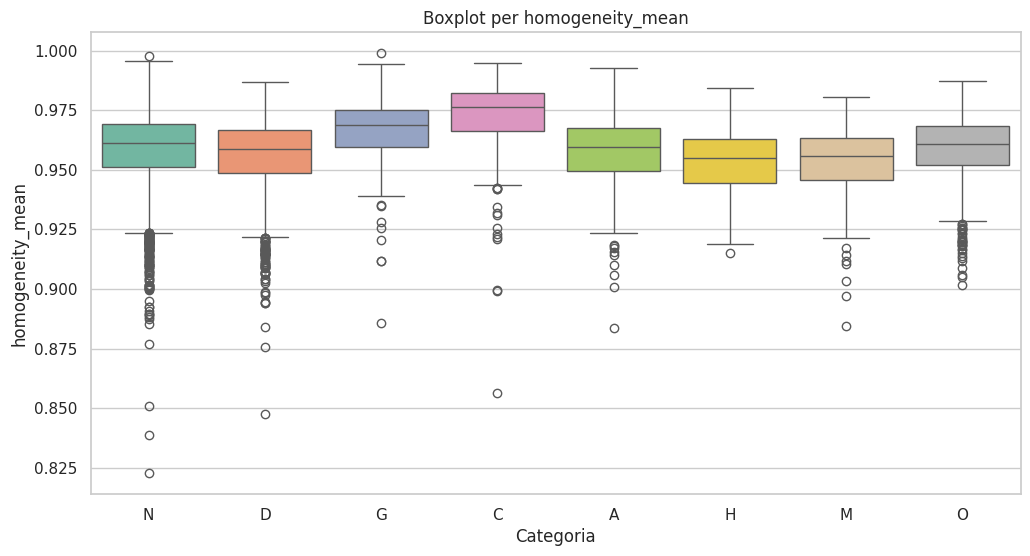

In [ ]:
from scipy.stats import mannwhitneyu


channel_glcm = ['contrast_mean', 'correlation_mean', 'energy_mean', 'homogeneity_mean']


# Mann-Whitney U Test for differences between Normal and Pathological Categories
print("\n\nMann-Whitney U Test Results:")
for feature in channel_glcm:
    normal_values = glcm_df[glcm_df['Category'] == 'N'][feature].dropna()  # Normal category data
    print('\n')
    for category in glcm_df['Category'].unique():
        if category == 'N':  # Skip comparison with itself
            continue
        pathological_values = glcm_df[glcm_df['Category'] == category][feature].dropna()  # Pathological category data

        # Perform Mann-Whitney U Test
        stat, p_value = mannwhitneyu(normal_values, pathological_values, alternative='two-sided')
        print(f"Comparison: Normal vs {category} for {feature}")
        print(f"  Mann-Whitney U Test: Statistic={stat:.4f}, p-value={p_value:.4e}")
        if p_value < 0.05:
            print(f" -> Differenza significativa tra N e {category} per {feature} (p < 0.05)\n")
        else:
            print(f" -> Nessuna differenza significativa tra N e {category} per {feature}\n")
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=feature, data=glcm_df, order=glcm_df['Category'].unique(), palette='Set2')
    plt.title(f'Boxplot per {feature}')
    plt.xlabel('Categoria')
    plt.ylabel(feature)
    plt.show()




---

# SHAPE DESCRIPTORS

In [ ]:
import cv2
def extract_edge_features(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Sobel Edge Detection
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = np.hypot(sobel_x, sobel_y)

    # Canny Edge Detection
    canny_edges = cv2.Canny(gray_image, 100, 200)

    features = {
        'sobel_mean': np.mean(sobel_edges),
        'sobel_std': np.std(sobel_edges),
        'canny_density': np.sum(canny_edges > 0) / gray_image.size
    }
    return features
columns = ['Image', 'Category', 'sobel_mean','sobel_std', 'canny_density']
rows = []
for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr = cv2.imread(immaginipath + '/' + file, cv2.IMREAD_COLOR)
    features_shape = extract_edge_features(img_bgr)
    row = {'Image': file, 'Category': category}
    row.update(features_shape)
    rows.append(row)

# Create the DataFrame
shape_df = pd.DataFrame(rows, columns=columns)


In [ ]:
print(shape_df.head())

          Image Category  sobel_mean  sobel_std  canny_density
0   0_right.jpg        N    8.714341  24.502454       0.006882
1   1_right.jpg        N   20.042303  40.030665       0.009018
2   8_right.jpg        N   20.157983  32.926632       0.007198
3  10_right.jpg        N   17.906068  46.288454       0.005718
4  29_right.jpg        N   12.277896  41.909415       0.006874


In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_results = []
channel_shape=['sobel_mean','sobel_std', 'canny_density']
for feature in channel_shape:
    category_data = shape_df[shape_df['Category'] == category]
    print('\n')
    for category in shape_df['Category'].unique():
        stat, p_value = shapiro(category_data[feature])
        shapiro_results.append({
            'Category': category,
            'Feature': feature,
            'Statistic': stat,
            'p_value': p_value
        })
        print(f"Shapiro-Wilk Test for {feature} in {category}: Statistic={stat:.4f}, p-value={p_value:.4e}")
        if p_value > 0.05:
            print(f"  The distribution for {category} in {feature} is normal (p-value > 0.05).\n")




Shapiro-Wilk Test for sobel_mean in N: Statistic=0.9789, p-value=1.4595e-08
Shapiro-Wilk Test for sobel_mean in D: Statistic=0.9789, p-value=1.4595e-08
Shapiro-Wilk Test for sobel_mean in G: Statistic=0.9789, p-value=1.4595e-08
Shapiro-Wilk Test for sobel_mean in C: Statistic=0.9789, p-value=1.4595e-08
Shapiro-Wilk Test for sobel_mean in A: Statistic=0.9789, p-value=1.4595e-08
Shapiro-Wilk Test for sobel_mean in H: Statistic=0.9789, p-value=1.4595e-08
Shapiro-Wilk Test for sobel_mean in M: Statistic=0.9789, p-value=1.4595e-08
Shapiro-Wilk Test for sobel_mean in O: Statistic=0.9789, p-value=1.4595e-08


Shapiro-Wilk Test for sobel_std in N: Statistic=0.9793, p-value=1.8140e-08
Shapiro-Wilk Test for sobel_std in D: Statistic=0.9793, p-value=1.8140e-08
Shapiro-Wilk Test for sobel_std in G: Statistic=0.9793, p-value=1.8140e-08
Shapiro-Wilk Test for sobel_std in C: Statistic=0.9793, p-value=1.8140e-08
Shapiro-Wilk Test for sobel_std in A: Statistic=0.9793, p-value=1.8140e-08
Shapiro-Wilk 



Mann-Whitney U Test Results:


Comparison: Normal vs D for sobel_mean
  Mann-Whitney U Test: Statistic=1934124.0000, p-value=1.4812e-19
 -> Differenza significativa tra N e D per sobel_mean (p < 0.05)

Comparison: Normal vs G for sobel_mean
  Mann-Whitney U Test: Statistic=572592.0000, p-value=2.7598e-29
 -> Differenza significativa tra N e G per sobel_mean (p < 0.05)

Comparison: Normal vs C for sobel_mean
  Mann-Whitney U Test: Statistic=660796.0000, p-value=2.7557e-58
 -> Differenza significativa tra N e C per sobel_mean (p < 0.05)

Comparison: Normal vs A for sobel_mean
  Mann-Whitney U Test: Statistic=322803.0000, p-value=2.7427e-05
 -> Differenza significativa tra N e A per sobel_mean (p < 0.05)

Comparison: Normal vs H for sobel_mean
  Mann-Whitney U Test: Statistic=131322.0000, p-value=4.2835e-08
 -> Differenza significativa tra N e H per sobel_mean (p < 0.05)

Comparison: Normal vs M for sobel_mean
  Mann-Whitney U Test: Statistic=216181.0000, p-value=4.9112e-19
 -> Differen

<ipython-input-48-b3cef08de5fd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=feature, data=shape_df, order=shape_df['Category'].unique(), palette='Set2')


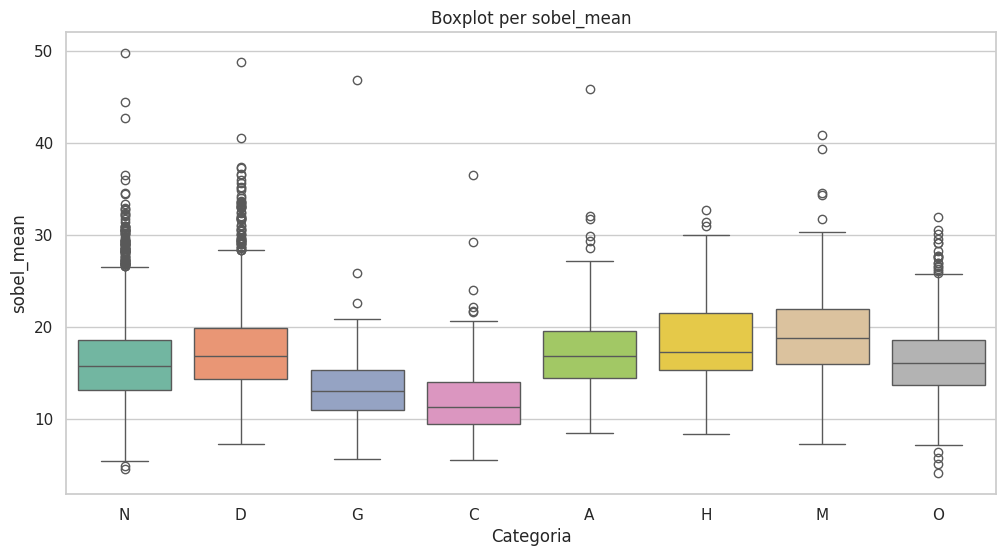



Comparison: Normal vs D for sobel_std
  Mann-Whitney U Test: Statistic=2013861.0000, p-value=1.0290e-12
 -> Differenza significativa tra N e D per sobel_std (p < 0.05)

Comparison: Normal vs G for sobel_std
  Mann-Whitney U Test: Statistic=508565.0000, p-value=6.6428e-12
 -> Differenza significativa tra N e G per sobel_std (p < 0.05)

Comparison: Normal vs C for sobel_std
  Mann-Whitney U Test: Statistic=339860.0000, p-value=5.4288e-08
 -> Differenza significativa tra N e C per sobel_std (p < 0.05)

Comparison: Normal vs A for sobel_std
  Mann-Whitney U Test: Statistic=342562.0000, p-value=5.1649e-03
 -> Differenza significativa tra N e A per sobel_std (p < 0.05)

Comparison: Normal vs H for sobel_std
  Mann-Whitney U Test: Statistic=151980.0000, p-value=8.8429e-04
 -> Differenza significativa tra N e H per sobel_std (p < 0.05)

Comparison: Normal vs M for sobel_std
  Mann-Whitney U Test: Statistic=304976.0000, p-value=3.1245e-02
 -> Differenza significativa tra N e M per sobel_std (

<ipython-input-48-b3cef08de5fd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=feature, data=shape_df, order=shape_df['Category'].unique(), palette='Set2')


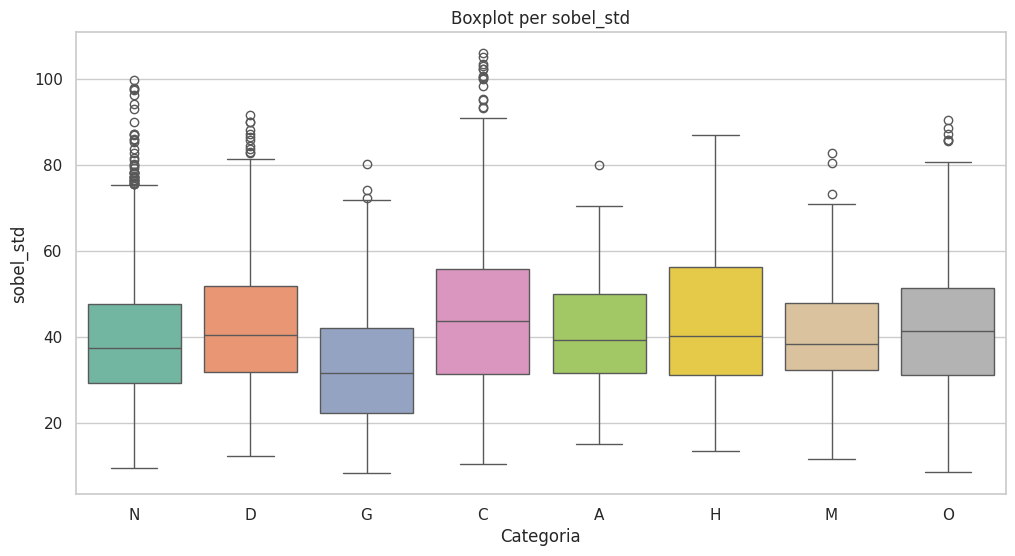



Comparison: Normal vs D for canny_density
  Mann-Whitney U Test: Statistic=2009042.5000, p-value=4.4022e-13
 -> Differenza significativa tra N e D per canny_density (p < 0.05)

Comparison: Normal vs G for canny_density
  Mann-Whitney U Test: Statistic=521047.5000, p-value=1.1910e-14
 -> Differenza significativa tra N e G per canny_density (p < 0.05)

Comparison: Normal vs C for canny_density
  Mann-Whitney U Test: Statistic=603502.5000, p-value=1.6515e-34
 -> Differenza significativa tra N e C per canny_density (p < 0.05)

Comparison: Normal vs A for canny_density
  Mann-Whitney U Test: Statistic=370990.5000, p-value=4.3174e-01
 -> Nessuna differenza significativa tra N e A per canny_density

Comparison: Normal vs H for canny_density
  Mann-Whitney U Test: Statistic=140011.5000, p-value=4.8125e-06
 -> Differenza significativa tra N e H per canny_density (p < 0.05)

Comparison: Normal vs M for canny_density
  Mann-Whitney U Test: Statistic=309051.5000, p-value=6.5232e-02
 -> Nessuna d

<ipython-input-48-b3cef08de5fd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=feature, data=shape_df, order=shape_df['Category'].unique(), palette='Set2')


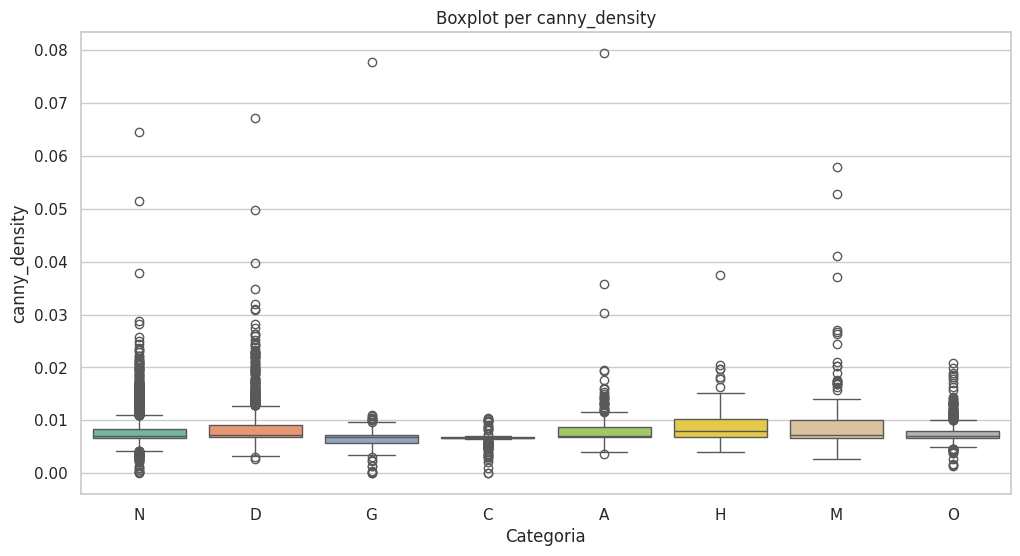

In [ ]:
# Mann-Whitney U Test for differences between Normal and Pathological Categories
print("\n\nMann-Whitney U Test Results:")
for feature in channel_shape:
    normal_values = shape_df[shape_df['Category'] == 'N'][feature].dropna()  # Normal category data
    print('\n')
    for category in shape_df['Category'].unique():
        if category == 'N':  # Skip comparison with itself
            continue
        pathological_values = shape_df[shape_df['Category'] == category][feature].dropna()  # Pathological category data

        # Perform Mann-Whitney U Test
        stat, p_value = mannwhitneyu(normal_values, pathological_values, alternative='two-sided')
        print(f"Comparison: Normal vs {category} for {feature}")
        print(f"  Mann-Whitney U Test: Statistic={stat:.4f}, p-value={p_value:.4e}")
        if p_value < 0.05:
            print(f" -> Differenza significativa tra N e {category} per {feature} (p < 0.05)\n")
        else:
            print(f" -> Nessuna differenza significativa tra N e {category} per {feature}\n")
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=feature, data=shape_df, order=shape_df['Category'].unique(), palette='Set2')
    plt.title(f'Boxplot per {feature}')
    plt.xlabel('Categoria')
    plt.ylabel(feature)
    plt.show()




---
# VESSEL DENSITY


In [ ]:
def extract_vessel_density(image):
    # Use the green channel as it often highlights vessels better
    green_channel = image[:, :, 1]

    # Thresholding for vessel segmentation
    _, binary_vessels = cv2.threshold(green_channel, 50, 255, cv2.THRESH_BINARY_INV)

    vessel_density = np.sum(binary_vessels > 0) / green_channel.size
    return {'vessel_density': vessel_density}


columns = ['Image', 'Category', 'vessel_density']
rows = []
for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr = cv2.imread(immaginipath + '/' + file, cv2.IMREAD_COLOR)
    features_shape = extract_vessel_density(img_bgr)
    row = {'Image': file, 'Category': category}
    row.update(features_shape)
    rows.append(row)

# Create the DataFrame
vessel_df = pd.DataFrame(rows, columns=columns)
print(vessel_df.head())

          Image Category  vessel_density
0   0_right.jpg        N        0.554722
1   1_right.jpg        N        0.219913
2   8_right.jpg        N        0.383724
3  10_right.jpg        N        0.155235
4  29_right.jpg        N        0.376652


In [ ]:
# Test di Shapiro-Wilk per ciascuna categoria
shapiro_results = []

for category in vessel_df['Category'].unique():
    category_vessel = vessel_df[entropy_df['Category'] == category]['vessel_density']
    stat, p_value = shapiro(category_vessel)
    shapiro_results.append({'Category': category, 'Shapiro_Stat': stat, 'P_Value': p_value})
    print(f"Test di Shapiro-Wilk per categoria {category}: Stat = {stat:.4f}, P-value = {p_value:.4f}")
    if p_value > 0.05:
        print(f"  La distribuzione per {category} è normale (p-value > 0.05).\n")
    else:
        print(f"  La distribuzione per {category} NON è normale (p-value <= 0.05).\n")


Test di Shapiro-Wilk per categoria N: Stat = 0.7854, P-value = 0.0000
  La distribuzione per N NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria D: Stat = 0.7012, P-value = 0.0000
  La distribuzione per D NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria G: Stat = 0.8784, P-value = 0.0000
  La distribuzione per G NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria C: Stat = 0.6782, P-value = 0.0000
  La distribuzione per C NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria A: Stat = 0.7591, P-value = 0.0000
  La distribuzione per A NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria H: Stat = 0.7173, P-value = 0.0000
  La distribuzione per H NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria M: Stat = 0.8655, P-value = 0.0000
  La distribuzione per M NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria O: Stat = 0.7607, P-value = 0.0000
  La distribuzione per O NO

Analisi per Vessel Density


<ipython-input-56-494db6660916>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='vessel_density', data=vessel_df, order=categories, palette='Set3')


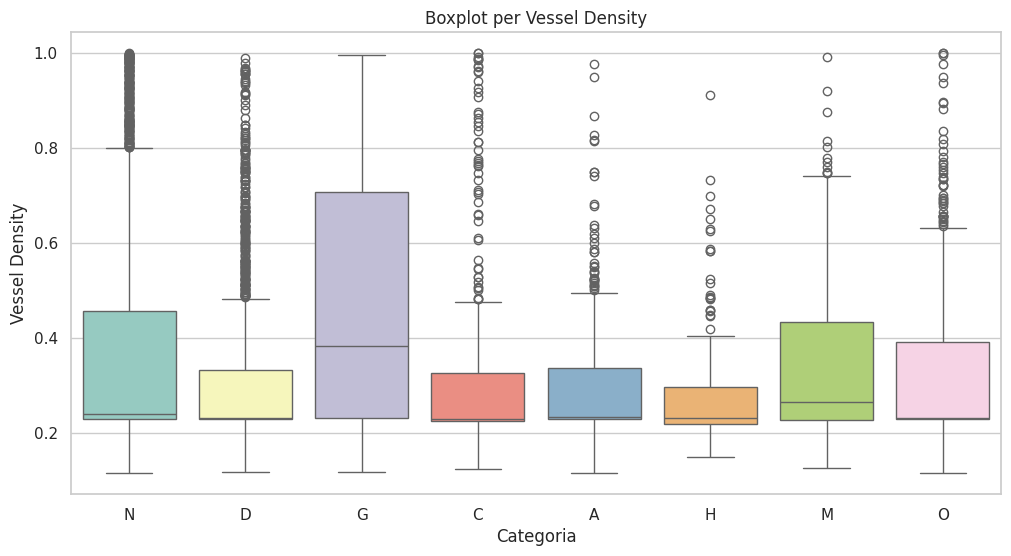

Confronto N vs D: stat=2541017.0000, p-value=2.6361e-08
 -> Differenza significativa tra N e D per Entropia (p < 0.05)
Confronto N vs G: stat=316742.0000, p-value=4.8046e-10
 -> Differenza significativa tra N e G per Entropia (p < 0.05)
Confronto N vs C: stat=492950.0000, p-value=1.3365e-06
 -> Differenza significativa tra N e C per Entropia (p < 0.05)
Confronto N vs A: stat=418657.0000, p-value=9.7523e-03
 -> Differenza significativa tra N e A per Entropia (p < 0.05)
Confronto N vs H: stat=217179.0000, p-value=5.1565e-04
 -> Differenza significativa tra N e H per Entropia (p < 0.05)
Confronto N vs M: stat=342002.5000, p-value=5.0608e-01
 -> Nessuna differenza significativa tra N e M per Entropia
Confronto N vs O: stat=1111798.5000, p-value=1.2032e-04
 -> Differenza significativa tra N e O per Entropia (p < 0.05)


In [ ]:
vessel_results=[]
def analyze_vessel_density(vessel_df, categories):
    print("Analisi per Vessel Density")

    # Creazione del boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y='vessel_density', data=vessel_df, order=categories, palette='Set3')
    plt.title('Boxplot per Vessel Density')
    plt.xlabel('Categoria')
    plt.ylabel('Vessel Density')
    plt.show()

    # Confronto tra Normale (N) e ciascuna patologia
    normal_values = vessel_df[vessel_df['Category'] == 'N']['vessel_density'].dropna()
    for category in categories:
        if category == 'N':
            continue
        category_values = vessel_df[vessel_df['Category'] == category]['vessel_density'].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(normal_values, category_values, alternative='two-sided')
        print(f"Confronto N vs {category}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra N e {category} per Entropia (p < 0.05)")
        else:
            print(f" -> Nessuna differenza significativa tra N e {category} per Entropia")
        vessel_results.append({'Category': category, 'p-value':p_value})
# Chiamata della funzione per analizzare l'entropia
analyze_vessel_density(vessel_df, categories)

